# survey.ipynb

**Author:** Fred Stelwagon  
**Date:** 3/2/2025  
**Class:** CMP-262 Data Science Programming  
**Project 1:** Survey Analysis  
**Submission 2:** Transformation, EDA, Cleansing & Analysis of 4 Questions

### Purpose
The purpose of this analysis is to introduce the concepts of Exploratory Data Analysis (EDA), Data Cleansing and simple data analysis. The data comes from a survey given to non-major students taking CMP classes.  

### Analysis: Answer 4 Questions:  
1. What are the changes over time (2020-24) in age demographics?  
2. What non-CMP degree/programs have the highest occurrences of respondents taking a Computer Literacy Course? Conversely, what are the least?  
3. What are the most effective information sources for non-CMP respondents seeking additional Computer Science courses? Conversely, what are the least?  
4. What interests are survey respondents seeking the most? Conversely, what are the least?  

### Approach:  
The following sections reflect the approach to arrive at the analysis stated above. The approach generally follows importing libraries, importing raw data, exploratory data analysis (EDA), data transformation & cleansing, followed by the analysis to address the questions asked. However, the specific approach was somewhat organic, especially with transformation, EDA and cleansing, which has a more cyclical nature, addressing needs as they presented. The actual approach is as follows:  
* Part 0: Import Libraries  
* Part 1: Import Raw Data  
* Part 2: Exploratory Data Analysis - Review column names  
* Part 3: Transform DataFrames - Rename and reorder column for each dataframe   
* Part 4: Transform DataFrames - Consolidate surveys by year to a single dataframe for analysis  
* Part 5: Exploratory Data Analysis - Checking for duplicate records  
* Part 6: Data Cleansing - Removing erroneous blank timestamp records  
* Part 7: Exploratory Data Analysis - Review survey dataframe  
* Part 8: Data Cleansing - Cleansing Data Types
* Part 9: Exploratory Data Analysis - Exploring the 'year' column  
* Part 10: Exploratory Data Analysis - Exploring the 'age' column   
* Part 11: Exploratory Data Analysis - Exploring the 'degreeenrolled' column  
* Part 12: Data Cleansing - Cleansing the 'degreeenrolled' column  
* Part 13: Exploratory Data Analysis - Exploring 'infosource' fields  
* Part 14: Exploratory Data Analysis - Exploring the 'interest' column  
* Part 15: Exploratory Data Analysis - Finalize after transforming, consolidating and data cleansing  
* Part 16: Data Analysis - What are the changes over time (2020-24) in age demographics?  
* Part 17: Data Analysis - What non-CMP degree/programs have the highest occurrences of respondents taking a Computer Literacy Course? Conversely, what are the least?
* Part 18: Data Analysis - What are the most effective information sources for non-CMP respondents seeking additional Computer Science courses? Conversely, what are the least?
* Part 19: Data Analysis - What interests are survey respondents seeking the most? Conversely, what are the least?  

### Part 0: Import Libraries
The following are libraries imported for the analysis to follow.

In [1629]:
import pandas as pd              # Pandas library for data manipulation and analysis. 
import numpy as np               # Numerical Python for numerical calculations.
import matplotlib.pyplot as plt  # Matlab Plotting Library for Python for plotting. 

### Part 1: Import Raw Data
Import raw survey data from csv files. Print the number of rows and columns for each for cursory data understanding.  

**Source Data Files:** (Fall, by Year)  
* Non-Majors Survey Results - Fall 2020.csv  
* Non-Majors Survey Results - Fall 2021.csv  
* Non-Majors Survey Results - Fall 2022.csv  
* Non-Majors Survey Results - Fall 2023.csv  
* Non-Majors Survey Results - Fall 2024.csv  

**Target DataFrames:** (By Year)  
* survey2020 (from 'Non-Major Survey Results - Fall 2020.csv')  
* survey2021 (from 'Non-Major Survey Results - Fall 2021.csv')  
* survey2022 (from 'Non-Major Survey Results - Fall 2022.csv')  
* survey2023 (from 'Non-Major Survey Results - Fall 2023.csv')  
* survey2024 (from 'Non-Major Survey Results - Fall 2024.csv')  

Evaluate the number of rows and columns (shape) of each dataframe. 

In [1630]:
survey2020 = pd.read_csv('Non-Majors Survey Results - Fall 2020.csv', encoding = 'utf-8')
survey2021 = pd.read_csv('Non-Majors Survey Results - Fall 2021.csv', encoding = 'utf-8')
survey2022 = pd.read_csv('Non-Majors Survey Results - Fall 2022.csv', encoding = 'utf-8')
survey2023 = pd.read_csv('Non-Majors Survey Results - Fall 2023.csv', encoding = 'utf-8')
survey2024 = pd.read_csv('Non-Majors Survey Results - Fall 2024.csv', encoding = 'utf-8')

print(f'Survey 2020 ... Number of Rows: {survey2020.shape[0]:>3d} Number of Columns: {survey2020.shape[1]:>3d}')
print(f'Survey 2021 ... Number of Rows: {survey2021.shape[0]:>3d} Number of Columns: {survey2021.shape[1]:>3d}')
print(f'Survey 2022 ... Number of Rows: {survey2022.shape[0]:>3d} Number of Columns: {survey2022.shape[1]:>3d}')
print(f'Survey 2023 ... Number of Rows: {survey2023.shape[0]:>3d} Number of Columns: {survey2023.shape[1]:>3d}')
print(f'Survey 2024 ... Number of Rows: {survey2024.shape[0]:>3d} Number of Columns: {survey2024.shape[1]:>3d}')

Survey 2020 ... Number of Rows: 202 Number of Columns:  44
Survey 2021 ... Number of Rows: 126 Number of Columns:  79
Survey 2022 ... Number of Rows: 131 Number of Columns:  96
Survey 2023 ... Number of Rows: 105 Number of Columns:  96
Survey 2024 ... Number of Rows:  92 Number of Columns:  71


#### Conclusion of Part 1: Import Raw Data:  
The number of columns differs in surveys year-to-year and will need to be cleansed/transformed to consolidate into a single dataframe to perform analysis across all years.

### Part 2: Exploratory Data Analysis - Review column names  
The overall objective is to transform survey dataframes (by year) to a standard format across all data frames so they can be consolidated.  

* Write a list of column names to file for each survey dataframe for review and analysis.  
* Review column names for reference and usability in code.  
* How similar are column names across the survey years?  

The datasets in question have some unruly column names, so two functions will be established to facilitate easy output for analysis:  
* write_column_names (writes a list of column names to a text file where each column is listed on its own line)  
* print_column_names (prints a list of column names to screen where each column is its own line on the screen)  

These functions will be set up first.

#### Function: write_column_names
**Purpose:** Write a list of column names to text file where each column name is listed on its own line in the text file, starting at column[0].  
**Arguments:**  
* df (dataframe): Dataframe whose column names will be written to file.  
* filename (string): Filename for output of the column names.

**Returns:** (none)  

Will be used to evaluate filenames off-line.

In [1631]:
def write_column_names(df, filename):
    col_names = df.columns.tolist()
    with open(filename, 'w') as file:
        for col in col_names:
            file.write(f'{col}\n')

#### Function: print_column_names
**Purpose:** Prints a list of column names to screen where each column name is listed on its own line, starting at column[0].  
**Arguments:**  
* df (dataframe): Dataframe whose column names will be written to file.  
* df_name (string): Dataframe for output of the column names.

**Returns:** (none)  

Will be used to evaluate filenames on-screen.

In [1632]:
def print_column_names(df, df_name):
    print(f'Dataframe: {df_name}')
    col_names = df.columns.tolist()
    for col in col_names:
        print(f'    {col}')
    print('')

#### Write Column Names to File
For each of the 5 imported dataframes: survey2020-24, by calling 'write_column_names' function for each survey dataframe.

In [1633]:
write_column_names(survey2020, 'pt02 - survey2020_columnnames.txt')
write_column_names(survey2021, 'pt02 - survey2021_columnnames.txt')
write_column_names(survey2022, 'pt02 - survey2022_columnnames.txt')
write_column_names(survey2023, 'pt02 - survey2023_columnnames.txt')
write_column_names(survey2024, 'pt02 - survey2024_columnnames.txt')

#### Print Column Names to Screen
For each of the 5 imported dataframes: survey2020-24, by calling 'print_column_names' function for each survey dataframe.

NOTE: This creates a large output block. It is easier to review from file (see above). Un-comment if you want to view on-screen.

In [1634]:
#print_column_names(survey2020, 'survey2020')
#print_column_names(survey2021, 'survey2021')
#print_column_names(survey2022, 'survey2022')
#print_column_names(survey2023, 'survey2023')
#print_column_names(survey2024, 'survey2024')

#### Conclusions from Part 2: Transform DataFrames  
* The column names are long and unruly. They will be difficult to reference in python. The columns **need to be renamed to something shorter and more consistent**.
* Some survey questions are basically the same year-to-year, with slight differences. The columns **need to be renamed for like questions** of the same target column names year-to-year.
* Some survey **questions are missing year-to-year**. 
* Questions are sometimes ordered differently year-to-year. We want to **pick a baseline ordering and follow that ordering year-to-year**.
* The **result will be all 5 dataframes of the same named columns in the same order**.

### Part 3: Transform DataFrames - Rename and reorder column for each dataframe   
The overall objective is to transform survey dataframes (by year) to a standard format across all data frames so they can be consolidated.  
* Rename dataframe columns to something short and manageable, that are consistently named year-to-year. Use 2024 (latest survey) as the model.
* Working backwards from 2024, as we will want to see the history of questions asked in that survey. For surveys in 2020-2023 (inclusive), we will:
    * Add a year column and populate it with the year of the dataframe.
    * There are some instances where a 2024 question can be derived from other columns in the current dataframe. For example, there is a column in 2024 indicating whether the student heard from CCM from their high school. In earlier years, it asked if they heard of CCM from their high school advisor/counselor, or from their teacher. The union of these two questions will answer the question if they heard of CCM from their high school.
    * Add dummy placeholders for each question that appears in 2024 and does not appear in the current survey dataframe. Values will be given NaN indicating 'no answer was given'.
    * Re-order columns to that of 2024, with the year as the first column.  

#### Rename Columns Survey2024
* The columns in 'survey2024' will be renamed to something shorter and more manageable.
* A new column for 'year' will be created at index=0 and populated with 2024 in each row.
* Write the column list to file for reference (survey2024_columnnames(transformed).txt). 
* Write the transformed survey dataframe to file (survey2020(transformed).csv).
* Print the number of rows and columns for 'survey2024'. 

The column names and order in 'survey2024' will become the template for all other survey dataframes.

In [1635]:
# Rename 2024 survey column names to something more manageable.
survey2024 = survey2024.rename(
    columns = {
        'Timestamp': 'timestamp',
        'Which course are you currently enrolled in?': 'courseenrolled',
        'What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]': 'motivation_required',
        'What motivated you to seek a computing class at CCM? [To keep current in computing skills]': 'motivation_current',
        'What motivated you to seek a computing class at CCM? [Career Advancement]': 'motivation_advancement',
        'What motivated you to seek a computing class at CCM? [Career Change]': 'motivation_careerchange',
        'What motivated you to seek a computing class at CCM? [Professional Development]': 'motivation_profdev',
        'What motivated you to seek a computing class at CCM? [Job Displacement]': 'motivation_jobdisplace',
        'What motivated you to seek a computing class at CCM? [Relocation]': 'motivation_relocation',
        'What motivated you to seek a computing class at CCM? [IT Industry Certifications]': 'motivation_indcert',
        'What motivated you to seek a computing class at CCM? [Financial]': 'motivation_financial',
        'What motivated you to seek a computing class at CCM? [Personal Enrichment]': 'motivation_enrichment',
        'What motivated you to seek a computing class at CCM? [Curiosity]': 'motivation_curiosity',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]': 'participate_openhouse',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]': 'participate_instdecday',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]': 'participate_oncampusinfosess',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [TItan\'s Tuesday Virtual Information Session]': 'participate_titanstue',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]': 'participate_womenwhodare',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]': 'participate_regcollegefair',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]':'impactenr_mshscompclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]':'impactenr_mshscompclub',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]':'impactenr_competitions',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]':'impactenr_afterschoolprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]':'impactenr_summerprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]':'impactenr_apclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]':'impactenr_dualenrollclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]':'impactenr_familyfriend',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]': 'impactenr_familyfriendinfield',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]':'impactenr_hscounslor',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]':'impactenr_employer',
        'How did you hear about County College of Morris  [CCM Web site]':'hear_ccmwebsite',
        'How did you hear about County College of Morris  [Billboard]':'hear_billboard',
        'How did you hear about County College of Morris  [Television]':'hear_tv',
        'How did you hear about County College of Morris  [Radio]':'hear_radio',
        'How did you hear about County College of Morris  [Social Media]':'hear_socmedia',
        'How did you hear about County College of Morris  [Community Event]':'hear_communityevent',
        'How did you hear about County College of Morris  [Family member or friend]':'hear_familyfriend',
        'How did you hear about County College of Morris  [Employer]': 'hear_employer',
        'How did you hear about County College of Morris  [Current student]':'hear_ccmstudent',
        'How did you hear about County College of Morris  [Alumni]':'hear_ccmalumni',
        'How did you hear about County College of Morris  [High School]': 'hear_hs',
        'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]': 'impactatt_affordable',
        'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]': 'impactatt_locconvenience',
        'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]': 'impactatt_progchoice',
        'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]': 'impactatt_onlineoff',
        'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]': 'impactatt_familyfriend',
        'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]': 'impactatt_facultystaff',
        'To what extent did the following impact your decision to attend County College of Morris? [College reputation]': 'impactatt_reputation',
        'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]': 'impactatt_scholarships',
        'To what extent did the following impact your decision to attend County College of Morris? [Transfer student]': 'impactatt_transferstud',
        'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]': 'impactatt_smallclass',
        'To what extent did the following impact your decision to attend County College of Morris? [Extra curricula opportunities]': 'impactatt_extracurricula',
        'What degree program are you currently enrolled in?': 'degreeenrolled',
        'Did you receive information about our computing course from any of the following sources? [High school guidance counselor]': 'infosource_hscounselor',
        'Did you receive information about our computing course from any of the following sources? [CCM Information Technologies Website]': 'infosource_ccmwebsite',
        'Did you receive information about our computing course from any of the following sources? [CCM Admissions]': 'infosource_ccmadmissions',
        'Did you receive information about our computing course from any of the following sources? [CCM advisor/counselor]': 'infosource_ccmcounselor',
        'Did you receive information about our computing course from any of the following sources? [Employer]': 'infosource_employer',
        'Did you receive information about our computing course from any of the following sources? [Other]': 'infosource_other',
        'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?': 'interest',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]': 'interest_webdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]': 'interest_cybersec',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]': 'interest_appdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]': 'interest_dataanalytics',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]': 'interest_mlai',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]': 'interest_compprog',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]': 'interest_gamedes',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'interest_hardware',
        'Gender': 'gender',
        'Race/ethnicity': 'race_ethnicity',
        'Age ': 'age'
    }
)

# Create column for year and populate with 2024.
survey2024.insert(0, 'year', '2024')

# Write the list of renamed column names for 2024 to text file for each survey (by year). 
write_column_names(survey2024, 'pt03 - survey2024_columnnames(transformed).txt')

# Write transformed dataframe to CSV file.
survey2024.to_csv('pt03 - survey2024(transformed).csv', index = False)

# Print number of Rows and Columns.
print(f'2024 Number of Rows: {survey2024.shape[0]:>3d} Number of Columns: {survey2024.shape[1]:>3d}')

2024 Number of Rows:  92 Number of Columns:  72


#### Function: reorder_survey_cols
**Purpose:** Reorders the columns of a survey file to that established by 'survey2024' dataframe.  
**Prerequisites:** The input survey dataframe must have the correct number of and named columns of 'survey2024' dataframe, in any order.  
**Arguments:**  survey (dataframe): Survey dataframe.  
**Returns:** survey (dataframe): Survey dataframe.  

Will be used to sort survey columns to the correct order.

In [1636]:
def reorder_survey_cols(survey):
    survey = survey[[
        'year',
        'timestamp',
        'courseenrolled',
        'motivation_required',
        'motivation_current',
        'motivation_advancement',
        'motivation_careerchange',
        'motivation_profdev',
        'motivation_jobdisplace',
        'motivation_relocation',
        'motivation_indcert',
        'motivation_financial',
        'motivation_enrichment',
        'motivation_curiosity',
        'participate_openhouse',
        'participate_instdecday',
        'participate_oncampusinfosess',
        'participate_titanstue',
        'participate_womenwhodare',
        'participate_regcollegefair',
        'impactenr_mshscompclass',
        'impactenr_mshscompclub',
        'impactenr_competitions',
        'impactenr_afterschoolprog',
        'impactenr_summerprog',
        'impactenr_apclass',
        'impactenr_dualenrollclass',
        'impactenr_familyfriend',
        'impactenr_familyfriendinfield',
        'impactenr_hscounslor',
        'impactenr_employer',
        'hear_ccmwebsite',
        'hear_billboard',
        'hear_tv',
        'hear_radio',
        'hear_socmedia',
        'hear_communityevent',
        'hear_familyfriend',
        'hear_employer',
        'hear_ccmstudent',
        'hear_ccmalumni',
        'hear_hs',
        'impactatt_affordable',
        'impactatt_locconvenience',
        'impactatt_progchoice',
        'impactatt_onlineoff',
        'impactatt_familyfriend',
        'impactatt_facultystaff',
        'impactatt_reputation',
        'impactatt_scholarships',
        'impactatt_transferstud',
        'impactatt_smallclass',
        'impactatt_extracurricula',
        'degreeenrolled',
        'infosource_hscounselor',
        'infosource_ccmwebsite',
        'infosource_ccmadmissions',
        'infosource_ccmcounselor',
        'infosource_employer',
        'infosource_other',
        'interest',
        'interest_webdev',
        'interest_cybersec',
        'interest_appdev',
        'interest_dataanalytics',
        'interest_mlai',
        'interest_compprog',
        'interest_gamedes',
        'interest_hardware',
        'gender',
        'race_ethnicity',
        'age',
    ]]

    return survey

#### Rename and Reorder Columns Survey2023
* The columns in 'survey2023' will be renamed to be consistent with 'survey2024'.  
* A new column for 'year' will be created and populated with 2023 in each row.  
* The columns will be re-ordered to match those of 'survey2024'.  
* Write the column list to file for reference (survey2023_columnnames(transformed).txt).  
* Write the transformed survey dataframe to file (survey2023(transformed).csv).  
* Print the number of rows and columns for 'survey2023'.  

In [1637]:
# Rename 2023 survey column names to something more manageable.
survey2023 = survey2023.rename(
    columns = {
        'Timestamp': 'timestamp',
        'Which course are you currently enrolled in?': 'courseenrolled',
        'How did you hear about County College of Morris? [CCM Web site]':'hear_ccmwebsite',
        'How did you hear about County College of Morris? [Social Media]':'hear_socmedia',
        'How did you hear about County College of Morris? [Community Event]':'hear_communityevent',
        'How did you hear about County College of Morris? [Family member or friend]':'hear_familyfriend',
        'How did you hear about County College of Morris? [Current CCM student]': 'hear_ccmstudent',          # NOT in 2024
        'How did you hear about County College of Morris? [CCM Alumni]': 'hear_ccmalumni',                    # NOT in 2024
        'How did you hear about County College of Morris? [High School Teacher]': 'hear_hsteacher',           # NOT in 2024
        'How did you hear about County College of Morris? [High School Counselor]': 'hear_hscounselor',       # NOT in 2024
        'How did you hear about County College of Morris? [In-app advertisement]': 'hear_inappadvert',        # NOT in 2024
        'How did you hear about County College of Morris? [Employer]': 'hear_employer',
        'How did you hear about County College of Morris? [Billboard]':'hear_billboard',
        'How did you hear about County College of Morris? [Television]':'hear_tv',
        'How did you hear about County College of Morris? [Radio]':'hear_radio',
        'How did you hear about County College of Morris? [Home mailer]': 'hear_homemailer',
        'How did you hear about County College of Morris? [Other]': 'hear_other',
        # How did you hear about County College of Morris  [High School]': 'hear_hs',                         # 2024 NOT in 2023. Possibly consolidate hear_hscounselor & hear_hsteacher to obtain this. 
        'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]': 'impactatt_affordable',
        'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]': 'impactatt_locconvenience',
        'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]': 'impactatt_progchoice',
        'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]': 'impactatt_onlineoff',
        'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]': 'impactatt_familyfriend',
        'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]': 'impactatt_facultystaff',
        'To what extent did the following impact your decision to attend County College of Morris? [College reputation]': 'impactatt_reputation',
        'To what extent did the following impact your decision to attend County College of Morris? [Financial Aid]': 'impactatt_finaid',                                                  # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]': 'impactatt_scholarships',
        'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]': 'impactatt_smallclass',
        'To what extent did the following impact your decision to attend County College of Morris? [Extra-curricular opportunities]': 'impactatt_extracurricula',                         # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [Accepted my transfer credits]': 'impactatt_acctransfercred',                          # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [Negative experience at another college]': 'impactatt_anothercollegenegexp',           # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [NJ Stars Program]': 'impactatt_njstars',                                              # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [Ability to transfer CCM credits to a 4-year school]': 'impactatt_transferstud',        
        'To what extent did the following impact your decision to attend County College of Morris? [Get college credit while in high school]': 'impactatt_credinhs',                      # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]': 'participate_openhouse',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]': 'participate_instdecday',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]': 'participate_oncampusinfosess',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Titans Tuesday (Virtual) Information Session]': 'participate_titanstue',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]': 'participate_womenwhodare',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]': 'participate_regcollegefair',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [HS Sharetime Information Session]': 'participate_hssharetime',                                               # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Challenger Program]': 'participate_challengerprog',                                             # NOT in 2024 
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [CyberSecurity Information Protection Program Participation ]': 'participate_cybersecinfoprog',  # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Information Session at my high school]': 'participate_hsinfosess',                              # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit with my high school]': 'participate_campusvishs',                                   # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit (individual)]': 'paricipate_campusvisitind',                                       # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Workforce Development class]' : 'participate_workforcedevclass',                                # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Corporate Training]': 'participate_corptrain',                                                  # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Teen Arts Festival]': 'participate_teenartsfest',                                               # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Summer camp at CCM]': 'participate_summercamp_ccm',                                             # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Hour of Code]': 'participate_hourofcode',                                                       # NOT in 2024
        'What motivated you to seek a computing class at CCM? [To keep current in computing skills]': 'motivation_current',
        'What motivated you to seek a computing class at CCM? [Curiosity]': 'motivation_curiosity',
        'What motivated you to seek a computing class at CCM? [Personal Enrichment]': 'motivation_enrichment',
        'What motivated you to seek a computing class at CCM? [Career Advancement]': 'motivation_advancement',
        'What motivated you to seek a computing class at CCM? [Career Change]': 'motivation_careerchange',
        'What motivated you to seek a computing class at CCM? [Professional Development]': 'motivation_profdev',
        'What motivated you to seek a computing class at CCM? [Job Displacement]': 'motivation_jobdisplace',
        'What motivated you to seek a computing class at CCM? [Financial]': 'motivation_financial',
        'What motivated you to seek a computing class at CCM? [Relocation]': 'motivation_relocation',
        'What motivated you to seek a computing class at CCM? [IT Industry Certifications]': 'motivation_indcert',
        'What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]': 'motivation_required',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]':'impactenr_mshscompclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]':'impactenr_mshscompclub',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]':'impactenr_competitions',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]':'impactenr_afterschoolprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]':'impactenr_summerprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]':'impactenr_apclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]':'impactenr_dualenrollclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]':'impactenr_familyfriend',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]': 'impactenr_familyfriendinfield',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]': 'impactenr_hscounslor',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]': 'impactenr_employer',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [CCM faculty member]': 'impactenr_ccmfaculty',                                                                                          # NOT in 2024
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [CCM advisor/counselor]': 'impactenr_ccmcounselor',                                                                                     # NOT in 2024 
        'What degree program are you currently enrolled in?': 'degreeenrolled',
        'Did you receive information about CCM computing classes from any of the following sources? [High school guidance counselor]': 'infosource_hscounselor',
        'Did you receive information about CCM computing classes from any of the following sources? [High School Teacher]': 'infosource_hsteacher',                   # NOT in 2024
        'Did you receive information about CCM computing classes from any of the following sources? [CCM Information Technologies Website]': 'infosource_ccmwebsite', 
        'Did you receive information about CCM computing classes from any of the following sources? [CCM Admissions]': 'infosource_ccmadmissions',
        'Did you receive information about CCM computing classes from any of the following sources? [CCM advisor/counselor]': 'infosource_ccmcounselor',
        'Did you receive information about CCM computing classes from any of the following sources? [Employer]': 'infosource_employer',
        'Did you receive information about CCM computing classes from any of the following sources? [CCM Workforce Development]': 'infosource_ccmworkforcedev',       # NOT in 2024
        'Did you receive information about CCM computing classes from any of the following sources? [NJ Workforce Development Program]': 'infosource_njworkforcedev', # NOT in 2024
        'Did you receive information about CCM computing classes from any of the following sources? [Other]': 'infosource_other',
        'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?': 'interest',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]': 'interest_webdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]': 'interest_cybersec',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]': 'interest_appdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]': 'interest_dataanalytics',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]': 'interest_mlai',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]': 'interest_compprog',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]': 'interest_gamedes',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'interest_hardware',
        'Gender': 'gender',
        'Race/ethnicity': 'race_ethnicity',
        'Age ': 'age'
    }
)

# Create column for year and populate with 2021.
survey2023['year'] = '2023'

# Create a new column 'hear_hs' based on 'hear_hsteacher' or 'hear_hscounselor'.
survey2023['hear_hs'] = survey2023.apply(
    lambda row: 'Yes' if row['hear_hsteacher'] == 'Yes' or row['hear_hscounselor'] == 'Yes' else ('No' if pd.notna(row['hear_hsteacher']) or pd.notna(row['hear_hscounselor']) else np.nan), 
    axis=1
)

# Reorder columns in 'survey2023' to match those in 'survey2024'.
survey2023 = reorder_survey_cols(survey2023)

# Write the list of renamed column names for 2023 to text file for each survey (by year). 
write_column_names(survey2023, 'pt03 - survey2023_columnnames(transformed).txt')

# Write transformed dataframe to CSV file.
survey2023.to_csv('pt03 - survey2023(transformed).csv', index = False)

# Print number of Rows and Columns.
print(f'2023 Number of Rows: {survey2023.shape[0]:>3d} Number of Columns: {survey2023.shape[1]:>3d}')

2023 Number of Rows: 105 Number of Columns:  72


#### Rename and Reorder Columns Survey2022  
* The columns in 'survey2022' will be renamed to be consistent with 'survey2024'.  
* A new column for 'year' will be created and populated with 2022 in each row.  
* The columns will be re-ordered to match those of 'survey2024'.  
* Write the column list to file for reference (survey2022_columnnames(transformed).txt).
* Write the transformed survey dataframe to file (survey2022(transformed).csv).
* Print the number of rows and columns for 'survey2022'.

In [1638]:
# Rename 2022 survey column names to something more manageable.
survey2022 = survey2022.rename(
    columns = {
        'Timestamp': 'timestamp',
        'Which course are you currently enrolled in?': 'courseenrolled',
        'How did you hear about County College of Morris? [CCM Web site]':'hear_ccmwebsite',
        'How did you hear about County College of Morris? [Social Media]':'hear_socmedia',
        'How did you hear about County College of Morris? [Community Event]':'hear_communityevent',
        'How did you hear about County College of Morris? [Family member or friend]':'hear_familyfriend',
        'How did you hear about County College of Morris? [Current CCM student]': 'hear_ccmstudent',          # NOT in 2024
        'How did you hear about County College of Morris? [CCM Alumni]': 'hear_ccmalumni',                    # NOT in 2024
        'How did you hear about County College of Morris? [High School Teacher]': 'hear_hsteacher',           # NOT in 2024
        'How did you hear about County College of Morris? [High School Counselor]': 'hear_hscounselor',       # NOT in 2024
        'How did you hear about County College of Morris? [In-app advertisement]': 'hear_inappadvert',        # NOT in 2024
        'How did you hear about County College of Morris? [Employer]': 'hear_employer',
        'How did you hear about County College of Morris? [Billboard]':'hear_billboard',
        'How did you hear about County College of Morris? [Television]':'hear_tv',
        'How did you hear about County College of Morris? [Radio]':'hear_radio',
        'How did you hear about County College of Morris? [Home mailer]': 'hear_homemailer',
        'How did you hear about County College of Morris? [Other]': 'hear_other',
        # 'How did you hear about County College of Morris  [High School]': 'hear_hs',                         # In 2024 NOT in 2023. Possibly consolidate hear_hscounselor & hear_hsteacher to obtain this. 
        'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]': 'impactatt_affordable',
        'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]': 'impactatt_locconvenience',
        'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]': 'impactatt_progchoice',
        'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]': 'impactatt_onlineoff',
        'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]': 'impactatt_familyfriend',
        'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]': 'impactatt_facultystaff',
        'To what extent did the following impact your decision to attend County College of Morris? [College reputation]': 'impactatt_reputation',
        'To what extent did the following impact your decision to attend County College of Morris? [Financial Aid]': 'impactatt_finaid',                                                  # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]': 'impactatt_scholarships',
        'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]': 'impactatt_smallclass',
        'To what extent did the following impact your decision to attend County College of Morris? [Extra-curricular opportunities]': 'impactatt_extracurricula',
        'To what extent did the following impact your decision to attend County College of Morris? [Accepted my transfer credits]': 'impactatt_transferstud',                          
        'To what extent did the following impact your decision to attend County College of Morris? [Negative experience at another college]': 'impactatt_anothercollegenegexp',           # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [NJ Stars Program]': 'impactatt_njstars',                                              # NOT in 2024
        'To what extent did the following impact your decision to attend County College of Morris? [Ability to transfer CCM credits to a 4-year school]': 'impactatt_transferout',      # NOT in 2024 
        'To what extent did the following impact your decision to attend County College of Morris? [Get college credit while in high school]': 'impactatt_credinhs',                      # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]': 'participate_openhouse',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]': 'participate_instdecday',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]': 'participate_oncampusinfosess',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Titans Tuesday (Virtual) Information Session]': 'participate_titanstue',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]': 'participate_womenwhodare',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]': 'participate_regcollegefair',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [HS Sharetime Information Session]': 'participate_hssharetime',                                               # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Challenger Program]': 'participate_challengerprog',                                             # NOT in 2024 
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [CyberSecurity Information Protection Program Participation ]': 'participate_cybersecinfoprog',  # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Information Session at my high school]': 'participate_hsinfosess',                              # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit with my high school]': 'participate_campusvishs',                                   # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit (individual)]': 'paricipate_campusvisitind',                                       # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Workforce Development class]' : 'participate_workforcedevclass',                                # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Corporate Training]': 'participate_corptrain',                                                  # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Teen Arts Festival]': 'participate_teenartsfest',                                               # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Summer camp at CCM]': 'participate_summercamp_ccm',                                             # NOT in 2024
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Hour of Code]': 'participate_hourofcode',                                                       # NOT in 2024
        'What motivated you to seek a computing class at CCM? [To keep current in computing skills]': 'motivation_current',
        'What motivated you to seek a computing class at CCM? [Curiosity]': 'motivation_curiosity',
        'What motivated you to seek a computing class at CCM? [Personal Enrichment]': 'motivation_enrichment',
        'What motivated you to seek a computing class at CCM? [Career Advancement]': 'motivation_advancement',
        'What motivated you to seek a computing class at CCM? [Career Change]': 'motivation_careerchange',
        'What motivated you to seek a computing class at CCM? [Professional Development]': 'motivation_profdev',
        'What motivated you to seek a computing class at CCM? [Job Displacement]': 'motivation_jobdisplace',
        'What motivated you to seek a computing class at CCM? [Financial]': 'motivation_financial',
        'What motivated you to seek a computing class at CCM? [Relocation]': 'motivation_relocation',
        'What motivated you to seek a computing class at CCM? [IT Industry Certifications]': 'motivation_indcert',
        'What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]': 'motivation_required',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]':'impactenr_mshscompclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]':'impactenr_mshscompclub',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]':'impactenr_competitions',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]':'impactenr_afterschoolprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]':'impactenr_summerprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]':'impactenr_apclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]':'impactenr_dualenrollclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]':'impactenr_familyfriend',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]': 'impactenr_familyfriendinfield',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]': 'impactenr_hscounslor',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]': 'impactenr_employer',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [CCM faculty member]': 'impactenr_ccmfaculty',                                                                                          # NOT in 2024
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [CCM advisor/counselor]': 'impactenr_ccmcounselor',                                                                                     # NOT in 2024 
        'What degree program are you currently enrolled in?': 'degreeenrolled',
        'Did you receive information about CCM computing classes from any of the following sources? [High school guidance counselor]': 'infosource_hscounselor',
        'Did you receive information about CCM computing classes from any of the following sources? [High School Teacher]': 'infosource_hsteacher',                   # NOT in 2024
        'Did you receive information about CCM computing classes from any of the following sources? [CCM Information Technologies Website]': 'infosource_ccmwebsite', 
        'Did you receive information about CCM computing classes from any of the following sources? [CCM Admissions]': 'infosource_ccmadmissions',
        'Did you receive information about CCM computing classes from any of the following sources? [CCM advisor/counselor]': 'infosource_ccmcounselor',
        'Did you receive information about CCM computing classes from any of the following sources? [Employer]': 'infosource_employer',
        'Did you receive information about CCM computing classes from any of the following sources? [CCM Workforce Development]': 'infosource_ccmworkforcedev',       # NOT in 2024
        'Did you receive information about CCM computing classes from any of the following sources? [NJ Workforce Development Program]': 'infosource_njworkforcedev', # NOT in 2024
        'Did you receive information about CCM computing classes from any of the following sources? [Other]': 'infosource_other',
        'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?': 'interest',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]': 'interest_webdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]': 'interest_cybersec',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]': 'interest_appdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]': 'interest_dataanalytics',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]': 'interest_mlai',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]': 'interest_compprog',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]': 'interest_gamedes',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'interest_hardware',
        'Gender': 'gender',
        'Race/ethnicity': 'race_ethnicity',
        'Age ': 'age'
    }
)

# Create column for year and populate with 2021.
survey2022['year'] = '2022'

# Create a new column 'hear_hs' based on 'hear_hsteacher' or 'hear_hscounselor'.
survey2022['hear_hs'] = survey2022.apply(
    lambda row: 'Yes' if row['hear_hsteacher'] == 'Yes' or row['hear_hscounselor'] == 'Yes' else ('No' if pd.notna(row['hear_hsteacher']) or pd.notna(row['hear_hscounselor']) else np.nan), 
    axis=1
)

# Reorder columns in 'survey2022' to match those in 'survey2024'.
survey2022 = reorder_survey_cols(survey2022)

# Write the list of renamed column names for 2022 to text file for each survey (by year). 
write_column_names(survey2022, 'pt03 - survey2022_columnnames(transformed).txt')

# Write transformed dataframe to CSV file.
survey2022.to_csv('pt03 - survey2022(transformed).csv', index = False)

# Print number of Rows and Columns.
print(f'2022 Number of Rows: {survey2022.shape[0]:>3d} Number of Columns: {survey2022.shape[1]:>3d}')

2022 Number of Rows: 131 Number of Columns:  72


#### Rename and Reorder Columns Survey2021  
* The columns in 'survey2021' will be renamed to be consistent with 'survey2024'.  
* A new column for 'year' will be created and populated with 2021 in each row.  
* The columns will be re-ordered to match those of 'survey2024'.  
* Write the column list to file for reference (survey2021_columnnames(transformed).txt).
* Write the transformed survey dataframe to file (survey2021(transformed).csv).
* Print the number of rows and columns for 'survey2021'.

In [1639]:
# Rename 2021 survey column names to something more manageable.
survey2021 = survey2021.rename(
    columns = {
        'Timestamp': 'timestamp',
        'Which course are you currently enrolled in?': 'courseenrolled',
        'What motivated you to seek a computing class at CCM? [It\'s a required class for the degree I\'m seeking]': 'motivation_required',
        'What motivated you to seek a computing class at CCM? [To keep current in computing skills]': 'motivation_current',
        'What motivated you to seek a computing class at CCM? [Career Advancement]': 'motivation_advancement',
        'What motivated you to seek a computing class at CCM? [Career Change]': 'motivation_careerchange',
        'What motivated you to seek a computing class at CCM? [Professional Development]': 'motivation_profdev',
        'What motivated you to seek a computing class at CCM? [Job Displacement]': 'motivation_jobdisplace',
        'What motivated you to seek a computing class at CCM? [Relocation]': 'motivation_relocation',
        'What motivated you to seek a computing class at CCM? [IT Industry Certifications]': 'motivation_indcert',
        'What motivated you to seek a computing class at CCM? [Financial]': 'motivation_financial',
        'What motivated you to seek a computing class at CCM? [Personal Enrichment]': 'motivation_enrichment',
        'What motivated you to seek a computing class at CCM? [Curiosity]': 'motivation_curiosity',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]': 'participate_openhouse',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]': 'participate_instdecday',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]': 'participate_oncampusinfosess',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [TItan\'s Tuesday Virtual Information Session]': 'participate_titanstue',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]': 'participate_womenwhodare',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]': 'participate_regcollegefair',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]':'impactenr_mshscompclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]':'impactenr_mshscompclub',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]':'impactenr_competitions',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]':'impactenr_afterschoolprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]':'impactenr_summerprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]':'impactenr_apclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]':'impactenr_dualenrollclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]':'impactenr_familyfriend',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]': 'impactenr_familyfriendinfield',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]': 'impactenr_hscounslor',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]': 'impactenr_employer',
        'How did you hear about County College of Morris  [CCM Web site]':'hear_ccmwebsite',
        'How did you hear about County College of Morris  [Billboard]':'hear_billboard',
        'How did you hear about County College of Morris  [Television]':'hear_tv',
        'How did you hear about County College of Morris  [Radio]':'hear_radio',
        'How did you hear about County College of Morris  [Social Media]':'hear_socmedia',
        'How did you hear about County College of Morris  [Community Event]':'hear_communityevent',
        'How did you hear about County College of Morris  [Family member or friend]':'hear_familyfriend',
        'How did you hear about County College of Morris  [Employer]': 'hear_employer',
        'How did you hear about County College of Morris  [Current student]': 'hear_ccmstudent',          # NOT in 2024
        'How did you hear about County College of Morris  [Alumni]': 'hear_ccmalumni',                    # NOT in 2024
        'How did you hear about County College of Morris  [High School]': 'hear_hs',                     
        'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]': 'impactatt_affordable',
        'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]': 'impactatt_locconvenience',
        'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]': 'impactatt_progchoice',
        'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]': 'impactatt_onlineoff',
        'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]': 'impactatt_familyfriend',
        'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]': 'impactatt_facultystaff',
        'To what extent did the following impact your decision to attend County College of Morris? [College reputation]': 'impactatt_reputation',
        'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]': 'impactatt_scholarships',
        'To what extent did the following impact your decision to attend County College of Morris? [Transfer student]': 'impactatt_transferstud',
        'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]': 'impactatt_smallclass',
        'To what extent did the following impact your decision to attend County College of Morris? [Extra curricula opportunities]': 'impactatt_extracurricula',
        'What degree program are you currently enrolled in?': 'degreeenrolled',
        'Did you receive information about our computing course from any of the following sources? [High school guidance counselor]': 'infosource_hscounselor',
        'Did you receive information about our computing course from any of the following sources? [CCM Information Technologies Website]': 'infosource_ccmwebsite', 
        'Did you receive information about our computing course from any of the following sources? [CCM Admissions]': 'infosource_ccmadmissions',
        'Did you receive information about our computing course from any of the following sources? [CCM advisor/counselor]': 'infosource_ccmcounselor',
        'Did you receive information about our computing course from any of the following sources? [Employer]': 'infosource_employer',
        'Did you receive information about our computing course from any of the following sources? [Other]': 'infosource_other',
        'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?': 'interest',
        'Computing Interest': 'compinterest', # NOT in 2024
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]': 'interest_webdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]': 'interest_cybersec',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]': 'interest_appdev',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]': 'interest_dataanalytics',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]': 'interest_mlai',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]': 'interest_compprog',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]': 'interest_gamedes',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'interest_hardware',
        'Gender': 'gender',
        'Race/ethnicity': 'race_ethnicity',
        'Age': 'age',
        'Unnamed: 77': 'unnamed77',                         # NOT in 2024
        'Count of Criminal Justice Majors': 'countcrimjust' # NOT in 2024
    }
)

# Create column for year and populate with 2021.
survey2021['year'] = '2021'

# Reorder columns in 'survey2021' to match those in 'survey2024'.
survey2021 = reorder_survey_cols(survey2021)

# Write the list of reordered column names for 2021 to text file for each survey (by year). 
write_column_names(survey2021, 'pt03 - survey2021_columnnames(transformed).txt')

# Write transformed dataframe to CSV file.
survey2021.to_csv('pt03 - survey2021(transformed).csv', index = False)

# Print number of Rows and Columns.
print(f'2021 Number of Rows: {survey2021.shape[0]:>3d} Number of Columns: {survey2021.shape[1]:>3d}')

2021 Number of Rows: 126 Number of Columns:  72


#### Rename and Reorder Columns Survey2020  
* The columns in 'survey2020' will be renamed to be consistent with 'survey2024'.  
* A new column for 'year' will be created and populated with 2020 in each row.
* New columns that did not occur in the 2020 survey will be created and populated with 'NaN' to indicate no data for these records.  
* The columns will be re-ordered to match those of 'survey2024'.  
* Write the column list to file for reference (survey2020_columnnames(transformed).txt).  
* Write the transformed survey dataframe to file (survey2020(transformed).csv).  
* Print the number of rows and columns for 'survey2020'.  

In [1640]:
# Rename 2020 survey column names to something more manageable.
survey2020 = survey2020.rename(
    columns = {
        'Timestamp': 'timestamp',
        'Which course are you currently enrolled in?': 'courseenrolled',
        #'What motivated you to seek a computing class at CCM? [It\'s a required class for the degree I\'m seeking]': 'motivation_required',  # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [To keep current in computing skills]': 'motivation_current',                  # in 2024 but NOT in 2020 
        #'What motivated you to seek a computing class at CCM? [Career Advancement]': 'motivation_advancement',                               # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Career Change]': 'motivation_careerchange',                                   # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Professional Development]': 'motivation_profdev',                             # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Job Displacement]': 'motivation_jobdisplace',                                 # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Relocation]': 'motivation_relocation',                                        # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [IT Industry Certifications]': 'motivation_indcert',                           # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Financial]': 'motivation_financial',                                          # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Personal Enrichment]': 'motivation_enrichment',                               # in 2024 but NOT in 2020
        #'What motivated you to seek a computing class at CCM? [Curiosity]': 'motivation_curiosity',                                          # in 2024 but NOT in 2020
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]': 'participate_openhouse',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]': 'participate_instdecday',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]': 'participate_oncampusinfosess',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Virtual Information Session]': 'participate_titanstue',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]': 'participate_womenwhodare',
        'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]': 'participate_regcollegefair',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]':'impactenr_mshscompclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]':'impactenr_mshscompclub',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]':'impactenr_competitions',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]':'impactenr_afterschoolprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]':'impactenr_summerprog',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]':'impactenr_apclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]':'impactenr_dualenrollclass',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]':'impactenr_familyfriend',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]': 'impactenr_familyfriendinfield',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]': 'impactenr_hscounslor',
        'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]': 'impactenr_employer',
        #'How did you hear about County College of Morris  [CCM Web site]':'hear_ccmwebsite',                # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Television]':'hear_billboard',                   # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Television]':'hear_tv',                          # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Radio]':'hear_radio',                            # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Social Media]':'hear_socmedia',                  # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Community Event]':'communityevent',              # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Family member or friend]':'hear_familyfriend',   # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [Employer]': 'hear_employer',                     # in 2024 but NOT in 2020
        #'How did you hear about County College of Morris  [High School]': 'hear_hs',                        # in 2024 but NOT in 2020
        'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]': 'impactatt_affordable',
        'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]': 'impactatt_locconvenience',
        'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]': 'impactatt_progchoice',
        'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]': 'impactatt_onlineoff',
        'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]': 'impactatt_familyfriend',
        'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]': 'impactatt_facultystaff',
        'To what extent did the following impact your decision to attend County College of Morris? [College reputation]': 'impactatt_reputation',
        'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]': 'impactatt_scholarships',
        'To what extent did the following impact your decision to attend County College of Morris? [Transfer student]': 'impactatt_transferstud',
        'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]': 'impactatt_smallclass',
        'To what extent did the following impact your decision to attend County College of Morris? [Extra curricula opportunities]': 'impactatt_extracurricula',
        'What degree program are you currently enrolled in?': 'degreeenrolled',
        'Did you receive information about our computing course from any of the following sources? [High school guidance counselor]': 'infosource_hscounselor',
        'Did you receive information about our computing course from any of the following sources? [CCM Information Technologies Website]': 'infosource_ccmwebsite', 
        'Did you receive information about our computing course from any of the following sources? [CCM Admissions]': 'infosource_ccmadmissions',
        'Did you receive information about our computing course from any of the following sources? [CCM advisor/counselor]': 'infosource_ccmcounselor',
        'Did you receive information about our computing course from any of the following sources? [Employer]': 'infosource_employer',
        'Did you receive information about our computing course from any of the following sources? [Other]': 'infosource_other',
        'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?': 'interest',
        'If you answered that you were interested in taking more computing classes, which ones interest you most? (check all that apply)': 'interest_checkall', # NOT in 2024
        'Computing Interest': 'compinterest', # NOT in 2024
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]': 'interest_webdev',                        # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]': 'interest_cybersec',                        # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]': 'interest_appdev',                        # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]': 'interest_dataanalytics',                  # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]': 'interest_mlai', # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]': 'interest_compprog',                 # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]': 'interest_gamedes',                           # in 2024 but NOT in 2020
        #'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'interest_hardware',       # in 2024 but NOT in 2020
        'Gender': 'gender',
        'Race/ethnicity': 'race_ethnicity',
        'Age ': 'age',
    }
)

# Create column for year and populate with 2020.
survey2020['year'] = '2020'

# Create columns for missing questions and populate with NaN. 
survey2020['motivation_required'] = np.nan 
survey2020['motivation_current'] = np.nan
survey2020['motivation_advancement'] = np.nan
survey2020['motivation_careerchange'] = np.nan
survey2020['motivation_profdev'] = np.nan
survey2020['motivation_jobdisplace'] = np.nan
survey2020['motivation_relocation'] = np.nan
survey2020['motivation_indcert'] = np.nan
survey2020['motivation_financial'] = np.nan
survey2020['motivation_enrichment'] = np.nan
survey2020['motivation_curiosity'] = np.nan
survey2020['hear_ccmwebsite'] = np.nan
survey2020['hear_billboard'] = np.nan
survey2020['hear_tv'] = np.nan
survey2020['hear_radio'] = np.nan
survey2020['hear_socmedia'] = np.nan
survey2020['hear_communityevent'] = np.nan
survey2020['hear_familyfriend'] = np.nan
survey2020['hear_employer'] = np.nan
survey2020['hear_ccmstudent'] = np.nan
survey2020['hear_ccmalumni'] = np.nan
survey2020['hear_hs'] = np.nan
survey2020['interest_webdev'] = np.nan
survey2020['interest_cybersec'] = np.nan
survey2020['interest_appdev'] = np.nan
survey2020['interest_dataanalytics'] = np.nan
survey2020['interest_mlai'] = np.nan
survey2020['interest_compprog'] = np.nan
survey2020['interest_gamedes'] = np.nan
survey2020['interest_hardware'] = np.nan

# Reorder columns in 'survey2020' to match those in 'survey2024'.
survey2020 = reorder_survey_cols(survey2020)

# Write the list of reoredered column names for 2020 to text file for each survey (by year). 
write_column_names(survey2020, 'pt03 - survey2020_columnnames(transformed).txt')

# Write transformed dataframe to CSV file.
survey2020.to_csv('pt03 - survey2020(transformed).csv', index = False)

# Print number of Rows and Columns.
print(f'2020 Number of Rows: {survey2020.shape[0]:>3d} Number of Columns: {survey2020.shape[1]:>3d}')

2020 Number of Rows: 202 Number of Columns:  72


#### Conclusions from Part 3: Transform DataFrames - Rename and reorder column for each dataframe   
* A column 'year' was added to the beginning of each dataframe.
* For each survey year:
    * Column names have been shortened to something manageable in code.
    * Columns that appear in a survey dataframe that do NOT appear in 2024 dataframe have been dropped (deleted).
    * Columns that appear in 2024 and do NOT appear in a another survey dataframe were created and given the value of 'NaN' to indicate 'no answer given'.
    * Columns were re-ordered to that of the 2024 survey.
    * The column names and order of columns were confirmed by writing the column names to a text file as a list and confirmed manually against that of 2024.  
* Number of columns for all surveys are equal (72 ... one more than 2024 accounting for the addition of 'year' column).
* Number of rows remains unchanged for each dataframe.
* **Transformation of individual surveys dataframes are considered SUCCESSFUL**.  

### Part 4: Transform DataFrames - Consolidate surveys by year to a single dataframe for analysis   
Concatenate the 5 surveys (by year) into a single dataframe (survey), where the column of each dataframe is appended to the bottom of the dataframe of the next. The resulting dataframe should have the same number of columns as all of the rest, and the sum of the number of rows of each survey year.

In [1641]:
# Concatinate surveys 2020-2024 to a single dataframe named survey.
survey = pd.concat([survey2024, survey2023, survey2022, survey2021, survey2020])

# Write the list of column names to text file for each survey (by year). 
write_column_names(survey, 'pt04 - survey_columnnames(transformed, consolidated).txt')

# Print number of Rows and Columns.
print(f'Survey Number of Rows: {survey.shape[0]:>3d} Number of Columns: {survey.shape[1]:>3d}')

# Write consolidated dataframe (survey) to CSV file.
survey.to_csv('pt04 - survey(transformed, consolidated).csv', index = False)

Survey Number of Rows: 656 Number of Columns:  72


#### Conclusions from Part 4: Transform DataFrames - Consolidate surveys by year to a single dataframe for analysis
* Surveys from 2020-2024 were concatenated into a single dataframe (survey).
* Number of columns equal the original number of columns from 2024, plus one, accounting for the addition of the 'year' column.
* Number of rows equal the sum of rows across all 5 surveys.
* The name and ordering match the transformed version of the 2024 survey.
* **Concatenation into a single dataframe considered SUCCESSFUL**.

### Part 5: Exploratory Data Analysis - Checking for duplicate records  
The overall objective of Exploratory Data Analysis is 'getting to know' the raw data related to questions we want answered in our analysis. For the purposes of this analysis, we will focus on the following questions:  
1. What are the changes over time (2020-24) in age demographics?  
2. What non-CMP degree/programs have the highest occurrences of respondents taking a Computer Literacy Course? Conversely, what are the least?
3. What are the most effective information sources for non-CMP respondents seeking additional Computer Science courses? Conversely, what are the least?
4. What interests are survey respondents seeking the most? Conversely, what are the least?

Unfortunately, this dataset does not have unique identifiers for each transaction. What it does have is a timestamp on each transaction, and the answers themselves. 

It is quite possible for two different people to answer the questions the same way. The data is controlled, so there are a limited number of possible values for each answer. 

It is also possible, although unlikely, that two different people submit at the exact same time. 

In this block, we will check to see if there are duplicate timestamps. If found, we will check the answers to see if they are identical. We will only remove duplicates if the timestamps are identical AND the answered questions are identical.

In [1642]:
# Generate duplicates and output the results to CSV for analysis.
survey[survey['timestamp'].duplicated(keep = False)].to_csv('pt05- duplicate_timestamps.csv', index = False)

#### Conclusions from Part 5: Exploratory Data Analysis - Checking for duplicate records   
See generated 'duplicates_timestamps.csv' file.  
The following duplicate timestamps were found:  
* Two rows had the timestamp of **2022/10/06 9:48:13 AM EST**. Reviewing the answers, we find different values, for example in 'motivation_required' field. Conclusion: **NOT a Duplicate** record.  
* Two rows had the timestamp of **2022/10/18 11:38:39 AM EST**. Reviewing the answers, we find different values, for example in 'motivation_advancement' field. Conclusion: **NOT a Duplicate** record.  
* Two rows had the timestamp of **2020/09/22 10:12:05 AM EST**. Reviewing the answers, we find different values, for example in 'participate_oncampusinfosess' field. Conclusion: **NOT a Duplicate** record.  
* Four rows had a **blank timestamp**. Reviewing the answers, we blank values for all but 'interest' field, which gives strange data in two of the four records (one out of range and one having a different datatype than the rest of the values). These records are considered **ERRONEOUS RECORDS** and should be removed as part of the Data Cleaning exercise.  

### Part 6 Data Cleansing - Removing erroneous blank timestamp records
When looking for duplicate records in 'Exploratory Data Analysis (Part 1), four erroneous records were found with blank timestamps, which does not make sense. The answered question fields were also found to be blank, except for the 'interest' field, where two of the four records had invalid data. As a result, these rows are deemed erroneous and will be removed.  

In [1643]:
# Print number of Rows and Columns.
print(f'Survey Number of Rows before row deletion: {survey.shape[0]:>3d} Number of Columns: {survey.shape[1]:>3d}')

# Remove all rows where 'timestamp' is blank. 
survey = survey[survey['timestamp'].notna() & (survey['timestamp'] != '')]

# Print number of Rows and Columns.
print(f'Survey Number of Rows after row deletion: {survey.shape[0]:>3d} Number of Columns: {survey.shape[1]:>3d}')

Survey Number of Rows before row deletion: 656 Number of Columns:  72
Survey Number of Rows after row deletion: 652 Number of Columns:  72


#### Conclusions from Part 6: Data Cleansing - Removing erroneous blank timestamp records  
Four rows **erroneous records removed SUCCESSFULLY**.  

### Part 7: Exploratory Data Analysis - Review survey dataframe  
In this block we will be examining some general information about the 'survey' dataframe. We will:
* Shape of the 'survey' dataframe.
* Head of the 'survey' dataframe.
* Tail of the 'survey' dataframe.
* Sample of the 'survey' dataframe.
* List the column names.

##### Shape of 'survey' dataframe.

In [1644]:
print(f'Survey dataframe: Number of Rows: {survey.shape[0]:>3d} Number of Columns: {survey.shape[1]:>3d}')

Survey dataframe: Number of Rows: 652 Number of Columns:  72


##### Head of 'survey' dataframe.

In [1645]:
survey.head()

,year,timestamp,courseenrolled,motivation_required,motivation_current,motivation_advancement,motivation_careerchange,motivation_profdev,motivation_jobdisplace,motivation_relocation,...,interest_cybersec,interest_appdev,interest_dataanalytics,interest_mlai,interest_compprog,interest_gamedes,interest_hardware,gender,race_ethnicity,age
0,2024,2024/09/10 10:47:35 AM AST,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,...,Yes,No,No,No,No,No,No,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20
1,2024,2024/09/10 11:00:05 AM AST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,Hispanic or Latino,19-20
2,2024,2024/09/10 11:02:51 AM AST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Yes,Man,Choose not to reply,18 and younger
3,2024,2024/09/10 11:05:25 AM AST,CMP 126 Computer Technology and Applications,No,Yes,No,No,No,No,No,...,No,No,Yes,No,No,Yes,No,Man,Hispanic or Latino,19-20
4,2024,2024/09/10 8:37:36 PM AST,CMP 101 Computer Information Literacy,Yes,Yes,Yes,No,Yes,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


##### Tail of 'survey' dataframe.

In [1646]:
survey.tail()

,year,timestamp,courseenrolled,motivation_required,motivation_current,motivation_advancement,motivation_careerchange,motivation_profdev,motivation_jobdisplace,motivation_relocation,...,interest_cybersec,interest_appdev,interest_dataanalytics,interest_mlai,interest_compprog,interest_gamedes,interest_hardware,gender,race_ethnicity,age
197,2020,2020/09/27 5:07:35 PM EST,CMP 135 Computer Concepts with Applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,White/Caucasian,19-20
198,2020,2020/09/30 8:45:44 AM EST,CMP 135 Computer Concepts with Applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,White/Caucasian,19-20
199,2020,2020/09/30 5:35:39 PM EST,CMP 101 Computer Information Literacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Hispanic or Latino;Black/African American,18 and younger
200,2020,2020/10/04 6:44:31 PM EST,CMP 126 Computer Technology and Applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,White/Caucasian,19-20
201,2020,2020/10/10 3:59:29 PM EST,CMP 126 Computer Technology and Applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,Asian;White/Caucasian,21-24


##### Sample of 'survey' dataframe.

In [1647]:
survey.sample(n=5)

,year,timestamp,courseenrolled,motivation_required,motivation_current,motivation_advancement,motivation_careerchange,motivation_profdev,motivation_jobdisplace,motivation_relocation,...,interest_cybersec,interest_appdev,interest_dataanalytics,interest_mlai,interest_compprog,interest_gamedes,interest_hardware,gender,race_ethnicity,age
88,2020,2020/09/18 4:15:34 PM EST,CMP 135 Computer Concepts with Applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,Hispanic or Latino,21-24
10,2020,2020/07/25 11:45:59 AM EST,CMP 135 Computer Concepts with Applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,White/Caucasian,21-24
31,2021,2021/10/06 5:46:04 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,No,No,Yes,No,No,...,No,No,Yes,No,No,No,No,Woman,White/Caucasian,19-20
101,2021,2021/10/15 11:48:45 AM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Man,White/Caucasian,25-34
40,2024,2024/09/12 8:05:28 PM AST,CMP 135 Computer Concepts with Applications,Yes,Yes,Yes,No,Yes,Yes,Yes,...,No,No,No,Yes,Yes,No,No,Woman,Hispanic or Latino,21-24


##### Columns of 'survey' dataframe. 

In [1648]:
survey.columns

Index(['year', 'timestamp', 'courseenrolled', 'motivation_required',
       'motivation_current', 'motivation_advancement',
       'motivation_careerchange', 'motivation_profdev',
       'motivation_jobdisplace', 'motivation_relocation', 'motivation_indcert',
       'motivation_financial', 'motivation_enrichment', 'motivation_curiosity',
       'participate_openhouse', 'participate_instdecday',
       'participate_oncampusinfosess', 'participate_titanstue',
       'participate_womenwhodare', 'participate_regcollegefair',
       'impactenr_mshscompclass', 'impactenr_mshscompclub',
       'impactenr_competitions', 'impactenr_afterschoolprog',
       'impactenr_summerprog', 'impactenr_apclass',
       'impactenr_dualenrollclass', 'impactenr_familyfriend',
       'impactenr_familyfriendinfield', 'impactenr_hscounslor',
       'impactenr_employer', 'hear_ccmwebsite', 'hear_billboard', 'hear_tv',
       'hear_radio', 'hear_socmedia', 'hear_communityevent',
       'hear_familyfriend', 'hear_e

##### Info of 'survey' dataframe. 

In [1649]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 201
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           652 non-null    object 
 1   timestamp                      652 non-null    object 
 2   courseenrolled                 652 non-null    object 
 3   motivation_required            450 non-null    object 
 4   motivation_current             450 non-null    object 
 5   motivation_advancement         450 non-null    object 
 6   motivation_careerchange        450 non-null    object 
 7   motivation_profdev             450 non-null    object 
 8   motivation_jobdisplace         450 non-null    object 
 9   motivation_relocation          450 non-null    object 
 10  motivation_indcert             450 non-null    object 
 11  motivation_financial           450 non-null    object 
 12  motivation_enrichment          450 non-null    object 


##### Data Types of 'survey' dataframe.

In [1650]:
survey.dtypes

year                   object
timestamp              object
courseenrolled         object
motivation_required    object
motivation_current     object
                        ...  
interest_gamedes       object
interest_hardware      object
gender                 object
race_ethnicity         object
age                    object
Length: 72, dtype: object

#### Conclusions from Part 7: Exploratory Data Analysis - Review survey dataframe  
The 'survey' dataframe is well named and ordered. However, the data typing can be a little tighter:  
* All of the categorical columns were typed as 'object', where they really should be 'string'.  
* While 'year' could be either a string or integer, this analysis really treats this value as a categorical variable, and we are NOT performing calculations on it. So, for this reason it will be kept as datatype 'string'.
* The 'timestamp' column will be converted to datatype 'datetime'. While we are not performing calculations on it, it could be kept as a string. However, to avoid future confusion , we will change it to 'datetime', which it really is.
* Also, 2024 timestamps use 'AST' as a time zone, which is an ambiguous, meaning it can be interpreted as either 'Atlantic Standard Time' or 'Arabian Standard Time'. As CCM is in the 'EST' time zone, we assume this to be a typo, and will correct each line to 'EST' time zone. 
* The one numeric column is correctly typed as a floating point value.
* Otherwise, the dataframe is considered 'tidy', where each column is a collected variable, and each row is a transaction.
* The datatypes should be cleansed per the above, and the cleanliness of each individual column should be examined.

The questions we will be answering are:
1. What are the changes over time (2020-24) in age demographics?  
2. What non-CMP degree/programs have the highest occurrences of respondents taking a Computer Literacy Course? Conversely, what are the least?  
3. What are the most effective information sources for non-CMP respondents seeking additional Computer Science courses? Conversely, what are the least?
4. What interests are survey respondents seeking the most? Conversely, what are the least?

To answer these questions, the following columns will be used. We will specifically explore and cleanse if necessary these fields:
* year
* age
* degreeenrolled
* infosource (multiple fields)
* interest (multiple fields)  

### Part 8: Data Cleansing - Cleansing Data Types  
In this block, we will correct the datatypes of the columns in the 'survey' dataframe identified in Part 5 above. 
* All 'timestamps' referencing 'AST' time zone' will be changed to 'EST' time zone. 
* All categorical columns (including 'year') will be converted from type 'object' to 'string'.  
* The 'timestamp' column will be converted to type 'datetime'.  

In [1651]:
# Convert all categorical column datatypes to 'string'.
survey['year'] = survey['year'].astype('string')
survey['timestamp'] = survey['timestamp'].astype('string')
survey['courseenrolled'] = survey['courseenrolled'].astype('string')
survey['motivation_required'] = survey['motivation_required'].astype('string')
survey['motivation_current'] = survey['motivation_current'].astype('string')
survey['motivation_advancement'] = survey['motivation_advancement'].astype('string')
survey['motivation_careerchange'] = survey['motivation_careerchange'].astype('string')
survey['motivation_profdev'] = survey['motivation_profdev'].astype('string')
survey['motivation_jobdisplace'] = survey['motivation_jobdisplace'].astype('string')
survey['motivation_relocation'] = survey['motivation_relocation'].astype('string')
survey['motivation_indcert'] = survey['motivation_indcert'].astype('string')
survey['motivation_financial'] = survey['motivation_financial'].astype('string')
survey['motivation_enrichment'] = survey['motivation_enrichment'].astype('string')
survey['motivation_curiosity'] = survey['motivation_curiosity'].astype('string')
survey['participate_openhouse'] = survey['participate_openhouse'].astype('string')
survey['participate_instdecday'] = survey['participate_instdecday'].astype('string')
survey['participate_oncampusinfosess'] = survey['participate_oncampusinfosess'].astype('string')
survey['participate_titanstue'] = survey['participate_titanstue'].astype('string')
survey['participate_womenwhodare'] = survey['participate_womenwhodare'].astype('string')
survey['participate_regcollegefair'] = survey['participate_regcollegefair'].astype('string')
survey['impactenr_mshscompclass'] = survey['impactenr_mshscompclass'].astype('string')
survey['impactenr_mshscompclub'] = survey['impactenr_mshscompclub'].astype('string')
survey['impactenr_competitions'] = survey['impactenr_competitions'].astype('string')
survey['impactenr_afterschoolprog'] = survey['impactenr_afterschoolprog'].astype('string')
survey['impactenr_summerprog'] = survey['impactenr_summerprog'].astype('string')
survey['impactenr_apclass'] = survey['impactenr_apclass'].astype('string')
survey['impactenr_dualenrollclass'] = survey['impactenr_dualenrollclass'].astype('string')
survey['impactenr_familyfriend'] = survey['impactenr_familyfriend'].astype('string')
survey['impactenr_familyfriendinfield'] = survey['impactenr_familyfriendinfield'].astype('string')
survey['impactenr_hscounslor'] = survey['impactenr_hscounslor'].astype('string')
survey['impactenr_employer'] = survey['impactenr_employer'].astype('string')
survey['hear_ccmwebsite'] = survey['hear_ccmwebsite'].astype('string')
survey['hear_billboard'] = survey['hear_billboard'].astype('string')
survey['hear_tv'] = survey['hear_tv'].astype('string')
survey['hear_radio'] = survey['hear_radio'].astype('string')
survey['hear_socmedia'] = survey['hear_socmedia'].astype('string')
survey['hear_communityevent'] = survey['hear_communityevent'].astype('string')
survey['hear_familyfriend'] = survey['hear_familyfriend'].astype('string')
survey['hear_employer'] = survey['hear_employer'].astype('string')
survey['hear_ccmstudent'] = survey['hear_ccmstudent'].astype('string')
survey['hear_ccmalumni'] = survey['hear_ccmalumni'].astype('string')
survey['hear_hs'] = survey['hear_hs'].astype('string')
survey['impactatt_affordable'] = survey['impactatt_affordable'].astype('string')
survey['impactatt_locconvenience'] = survey['impactatt_locconvenience'].astype('string')
survey['impactatt_progchoice'] = survey['impactatt_progchoice'].astype('string')
survey['impactatt_onlineoff'] = survey['impactatt_onlineoff'].astype('string')
survey['impactatt_familyfriend'] = survey['impactatt_familyfriend'].astype('string')
survey['impactatt_facultystaff'] = survey['impactatt_facultystaff'].astype('string')
survey['impactatt_reputation'] = survey['impactatt_reputation'].astype('string')
survey['impactatt_scholarships'] = survey['impactatt_scholarships'].astype('string')
survey['impactatt_transferstud'] = survey['impactatt_transferstud'].astype('string')
survey['impactatt_smallclass'] = survey['impactatt_smallclass'].astype('string')
survey['impactatt_extracurricula'] = survey['impactatt_extracurricula'].astype('string')
survey['degreeenrolled'] = survey['degreeenrolled'].astype('string')
survey['infosource_hscounselor'] = survey['infosource_hscounselor'].astype('string')
survey['infosource_ccmwebsite'] = survey['infosource_ccmwebsite'].astype('string')
survey['infosource_ccmadmissions'] = survey['infosource_ccmadmissions'].astype('string')
survey['infosource_ccmcounselor'] = survey['infosource_ccmcounselor'].astype('string')
survey['infosource_employer'] = survey['infosource_employer'].astype('string')
survey['infosource_other'] = survey['infosource_other'].astype('string')
# survey['interest'] ... NOT Categorical but numerical. Leave as 'float'
survey['interest_webdev'] = survey['interest_webdev'].astype('string')
survey['interest_cybersec'] = survey['interest_cybersec'].astype('string')
survey['interest_appdev'] = survey['interest_appdev'].astype('string')
survey['interest_dataanalytics'] = survey['interest_dataanalytics'].astype('string')
survey['interest_mlai'] = survey['interest_mlai'].astype('string')
survey['interest_compprog'] = survey['interest_compprog'].astype('string')
survey['interest_gamedes'] = survey['interest_gamedes'].astype('string')
survey['interest_hardware'] = survey['interest_hardware'].astype('string')
survey['gender'] = survey['gender'].astype('string')
survey['race_ethnicity'] = survey['race_ethnicity'].astype('string')
survey['age'] = survey['age'].astype('string')

# Correct 'AST' to 'EST' timezone.
survey['timestamp'] = survey['timestamp'].str.replace('AST', 'EST')

# NOTE: AI used (MS Copilot) to help correct errors. Prompt: 'When I run "survey['timestamp'] = pd.to_datetime(survey['timestamp'])" 
# I get an error "ValueError: time data "2023/09/05 9:36:31 PM EST" doesn't match format "%Y/%m/%d %I:%M:%S %p AST", at position 92. 
# You might want to try: - passing `format` if your strings have a consistent format; - passing `format='ISO8601'` if your strings 
# are all ISO8601 but not necessarily in exactly the same format; - passing `format='mixed'`, and the format will be inferred for each 
# element individually. You might want to use `dayfirst` alongside this." ... how do I correct this?'. Code provided used. 

# Convert 'timestamp' to type 'datatime'.
survey['timestamp'] = pd.to_datetime(
    survey['timestamp'], 
    format = '%Y/%m/%d %I:%M:%S %p %Z',
    errors = 'coerce'
)

# List to screen info (including datatype) of the 'survey' dataframe.
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 201
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   year                           652 non-null    string                   
 1   timestamp                      652 non-null    datetime64[ns, UTC-05:00]
 2   courseenrolled                 652 non-null    string                   
 3   motivation_required            450 non-null    string                   
 4   motivation_current             450 non-null    string                   
 5   motivation_advancement         450 non-null    string                   
 6   motivation_careerchange        450 non-null    string                   
 7   motivation_profdev             450 non-null    string                   
 8   motivation_jobdisplace         450 non-null    string                   
 9   motivation_relocation          450 no

#### Conclusion from Part 8: Data Cleansing - Cleansing Data Types  
* All categorical values were converted from datatype 'object' to 'string'.
* Time zone was corrected in 'timestamp' field from ambiguous 'AST' to 'EST'.
* The 'timestamp' field was converted to datatype 'datetime'.
* **Cleansing** of datatypes was **SUCCESSFUL**.  

### Part 9: Exploratory Data Analysis - Exploring the 'year' column 
As stated before, the overall objective of Exploratory Data Analysis is 'getting to know' the data related to questions we want answered in our analysis. All four questions in this analysis will use the ‘year’ field, as we will want to see any trends year-to-year.

In this block we will be examining the 'year' field, that will be used specifically to answer question 1, as well as others. We will:
* Describe the column.
* List unique values.
* Count 'NaN' values.  

##### Describe 'year' column in 'survey' dataframe.

In [1652]:
survey['year'].describe()

count      652
unique       5
top       2020
freq       202
Name: year, dtype: object

##### List unique values in 'year' column.

In [1653]:
print(f"Unique values in 'year' column: {survey['year'].unique()} ")

Unique values in 'year' column: <StringArray>
['2024', '2023', '2022', '2021', '2020']
Length: 5, dtype: string 


##### Count 'NaN' values in 'year' column.

In [1654]:
print(f"Number of \'NaN\' values in 'year' column: {survey['year'].isna().sum()}")

Number of 'NaN' values in 'year' column: 0


#### Conclusions from Part 9: Exploratory Data Analysis - Exploring the 'year' column 
The 'year' field:
* Is of type ‘string’. 
* Has 5 unique values, all of which are consistent, expected and understandable, representing the year of the transaction.
* Has no 'NaN' values.
* There is **NO need for further cleansing** on this field.  

### Part 10: Exploratory Data Analysis - Exploring the 'age' column  
As stated before, the overall objective of Exploratory Data Analysis is 'getting to know' the raw data related to questions we want answered in our analysis. The first question to be answered in the analysis will use the ‘age’ column.

In this block we will examine the 'age' field. We will:
* Describe the column.
* List unique values.
* Count 'NaN' values.  

##### Describe 'age' column in 'survey' dataframe.

In [1655]:
survey['age'].describe()

count       652
unique        6
top       19-20
freq        289
Name: age, dtype: object

##### List unique values in 'age' column.

In [1656]:
print(f"Unique values in 'age' column: {survey['age'].unique()}")

Unique values in 'age' column: <StringArray>
['19-20', '18 and younger', '25-34', '21-24', '35-64', '65+']
Length: 6, dtype: string


##### Count 'NaN' values in 'age' column.

In [1657]:
print(f"Number of 'NaN' values in 'age' column: {survey['year'].isna().sum()}")

Number of 'NaN' values in 'age' column: 0


#### Conclusions from Part 10: Exploratory Data Analysis - Exploring the 'age' column  
The 'age' field:
* Is of type ‘string’.
* Is a set of age ranges, making it a categorical variable.
* Has 6 unique values, all of which are consistent, expected and understandable.
* It has no 'NaN' values.
* There is **NO need for further cleansing** on this field.  

### Part 11: Exploratory Data Analysis - Exploring the 'degreeenrolled' column  
As stated before, the overall objective of Exploratory Data Analysis is 'getting to know' the raw data related to questions we want answered in our analysis. The second question to be answered in the analysis will use the ‘degreeenrolled’ column.

In this block, we will examine the 'degreeenrolled' field. We will:
* Describe the column.
* List unique values.
* Count 'NaN' values.
* Count empty string values.  

##### Describe 'degreeenrolled' column in 'survey' dataframe.

In [1658]:
survey['degreeenrolled'].describe()

count                  652
unique                  84
top       Criminal Justice
freq                   113
Name: degreeenrolled, dtype: object

##### List unique values in 'degreeenrolled' column.

In [1659]:
print(f"Unique values in 'degreeenrolled' column: {survey['degreeenrolled'].unique()}")

Unique values in 'degreeenrolled' column: <StringArray>
[                                      'Liberal Arts',
                                  'child psychology ',
                   'Broadcasting Arts and Technology',
                                            'analyst',
                                         'Journalism',
                          'Early Childhood Education',
                                            'Nursing',
                                        'Radiography',
                                   'Exercise Science',
                                'Engineering Science',
                                   'Music Technology',
 'Nursing, but not at CCM - I am a visiting student ',
                                         'Psychology',
                                   'Criminal Justice',
                            'Not in a degree program',
                                            'Biology',
                         'Culinary Arts and Sciences',
         

##### Count of 'NaN' values in 'degreeenrolled' column.

In [1660]:
print(f"Number of 'NaN' values in 'degreeenrolled' column: {survey['degreeenrolled'].isna().sum()}")

Number of 'NaN' values in 'degreeenrolled' column: 0


##### Count of empty string values in 'degreeenrolled' column.

In [1661]:
print(f"Number of empty string values in 'degreeenrolled' column: {(survey['degreeenrolled'] == '').sum()}")

Number of empty string values in 'degreeenrolled' column: 0


#### Conclusions from Part 11: Exploratory Data Analysis - Exploring the 'degreeenrolled' column  
The 'degreeenrolled' field:
* Is of type ‘string’.
* Has **84 unique values**.
* Has no 'NaN' or empty string values.
* It appears that this field is **not well controlled** and has some 'free text' capability to it. As such, **data is inconsistent** in values and formatting.
* There also appears to be two degrees listed that are in the **CMP programs**. These apparently are respondents that filed the wrong survey. **These records will need to be removed**.
* **There IS a need to clean this field**. I propose renaming values to be consistent with those in the CCM 'Degrees & Certificates' listing. Any entry that cannot be mapped will be listed as 'other'. Furthermore, the records with programs within CMP will be removed as erroneous records.  

### Part 12: Data Cleansing - Cleansing the 'degreeenrolled' column  
The Exploratory Data Analysis identified this field as needing cleansing. This field was NOT well controlled and appeared to have some element of free-text entry associated with it. We will attempt to **map the unique entries to the CCM 'Degrees & Certificates' listing**. Those that cannot be mapped will be listed as 'Other'. We will also **remove ‘CMP’ related degree/program records** from the dataframe as this survey was supposed to be completed by non-CMP students.  

In [1662]:
# Remap degrees/programs to CCM portfolio
survey['degreeenrolled'] = survey['degreeenrolled'].replace(' want to go into radiography ', 'Radiography')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('30 College credit program', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Biology - Environmental Track', 'Biology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Broadcast Journalism', 'Broadcasting Arts and Technology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Business', 'Business Administration')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Business Administrative', 'Business Administration')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('COMPUTER AIDED DESIGNING AND DRAFTING', 'Computer - Aided Drafting')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Communication;Radiography', 'Communication')  # 'Communication considered primary as listed first.
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Comp Aided Drafting Tech', 'Computer - Aided Drafting')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Computer Information Systems', 'Information Technology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Culinary Arts and Science ', 'Culinary Arts and Sciences')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Culinary arts and science ', 'Culinary Arts and Sciences')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Early Childhood Education;Child and Family Studies', 'Early Childhood Education')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Environmental Science', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('fashion design  ', 'Fashion Design Track')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Fine Arts Fashion Merchandising ', 'Fashion Merchandising Track')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Fire Science ', 'Fire Science Technology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Fire Science Technologies ', 'Fire Science Technology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('History Education', 'Teacher Education - History')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Hospitality', 'Hospitality Management')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Hospitality ', 'Hospitality Management')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Hospitality Mgmt', 'Hospitality Management')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Hospitality Management ', 'Hospitality Management')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Human Resources/ Psychology', 'Human Resources - Generalist')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Human Services', 'Human Services: Pre-Social Work')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Human Services ', 'Human Services: Pre-Social Work')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Humanities', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Humanities and Social Sciences (Liberal Arts & Sciences', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Humanities Social Sciences', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Liberal Arts', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Liberal Arts & Sciences', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Liberal Arts and Sciences', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Liberal arts', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Math education ', 'Teacher Education - Mathematics')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Mathematics and Financial', 'Mathematics')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Mathmatics', 'Mathematics')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Music Performance', 'Music')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Music Technology', 'Music')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Music performance', 'Music')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Music recording', 'Music Recording')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Not in a degree program', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Nursing, but not at CCM - I am a visiting student ', 'Nursing')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Physical Education ', 'Teacher Education - Physical/Health Education')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Political Science', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Psychology', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Psychology ', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Public Administration', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Radiography;Nursing', 'Radiography')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Sharetime Criminal Justice Program', 'Criminal Justice')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Sociology-Humanities', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Teacher Education for Phys Ed and Health', 'Teacher Education - Physical/Health Education')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Teaching Mathematics', 'Teacher Education - Mathematics')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Theatre Technology', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Thinking of Biology and Engineering.', 'Biology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('Visual Fine Arts', 'Visual Arts')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('World Language', 'Languages')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('analyst', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('biology', 'Biology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('biology ', 'Biology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('child psychology ', 'Other')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('fashion design', 'Fashion Design Track')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('fire science and technology', 'Fire Science Technology')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('humanities ', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('liberal arts', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('liberal arts/humanitites', 'Humanities and Social Sciences (Liberal Arts & Sciences)')
survey['degreeenrolled'] = survey['degreeenrolled'].replace('psychology , liberal arts', 'Humanities and Social Sciences (Liberal Arts & Sciences)')

# Remove CMP-related entries
survey = survey[survey['degreeenrolled'] != 'Computer Science']
survey = survey[survey['degreeenrolled'] != 'Information Technology']

##### Describe 'degreeenrolled' column in 'survey' dataframe AFTER CLEANSING.

In [1663]:
survey['degreeenrolled'].describe()

count                  649
unique                  33
top       Criminal Justice
freq                   114
Name: degreeenrolled, dtype: object

##### List unique values in 'degreeenrolled' column AFTER CLEANSING.

In [1664]:
print(f"Unique values in 'degreeenrolled' column: {survey['degreeenrolled'].unique()}")

Unique values in 'degreeenrolled' column: <StringArray>
['Humanities and Social Sciences (Liberal Arts & Sciences)',
                                                    'Other',
                         'Broadcasting Arts and Technology',
                                               'Journalism',
                                'Early Childhood Education',
                                                  'Nursing',
                                              'Radiography',
                                         'Exercise Science',
                                      'Engineering Science',
                                                    'Music',
                                         'Criminal Justice',
                                                  'Biology',
                               'Culinary Arts and Sciences',
                              'Teacher Education - History',
                                            'Communication',
                             

#### Conclusions from Part 12: Data Cleansing - Cleansing the 'degreeenrolled' column  
The 'degreeenrolled' column was cleansed as well as can be expected without additional information or insight. Inconsistent data was mapped as well as can be expected to the CCM 'Degrees & Certificates' or 'Other', based on best guess on available values. CMP related records were also removed. The unique values in this column was reduced from 84 to 33 and 3 records removed. The **cleansing of 'degreeenrolled' is considered SUCCESSFUL**.

### Part 13: Exploratory Data Analysis - Exploring 'infosource' fields 
As stated before, the overall objective of Exploratory Data Analysis is 'getting to know' the raw data related to questions we want answered in our analysis. The third question to be answered in the analysis will use the 'infosource' columns. The 'infosource' fields tell us where people are getting information about CCM.  

There are multiple 'infosource' fields:
* infosource_hscounslor (High School Counselor)
* infosource_ccmwebsite (CCM Website)
* infosource_ccmadmissions (CCM Admissions)
* infosource_ccmcounselor (CCM Counselor)
* infosource_employer (Employer)
* infosource_other (Other)
  
For each 'infosource' field, we will:
* Describe the column.
* List unique values.
* Count 'NaN' values.

##### Describe 'infosource_hscounselor'

In [1665]:
survey['infosource_hscounselor'].describe()

count     649
unique      3
top        No
freq      504
Name: infosource_hscounselor, dtype: object

##### Describe 'infosource_ccmwebsite'

In [1666]:
survey['infosource_ccmwebsite'].describe()

count     649
unique      3
top        No
freq      477
Name: infosource_ccmwebsite, dtype: object

##### Describe 'infosource_ccmadmissions'

In [1667]:
survey['infosource_ccmadmissions'].describe()

count     649
unique      3
top        No
freq      384
Name: infosource_ccmadmissions, dtype: object

##### Describe 'infosource_ccmcounselor'

In [1668]:
survey['infosource_ccmcounselor'].describe()

count     649
unique      3
top        No
freq      321
Name: infosource_ccmcounselor, dtype: object

##### Describe 'infosource_employer'

In [1669]:
survey['infosource_employer'].describe()

count     649
unique      3
top        No
freq      564
Name: infosource_employer, dtype: object

##### Describe 'infosource_other'

In [1670]:
survey['infosource_other'].describe()

count     649
unique      3
top        No
freq      507
Name: infosource_other, dtype: object

##### List Unique Values for all 'infosource' fields.

In [1671]:
print(f"Unique values in 'infosource_hscounselor' column: {survey['infosource_hscounselor'].unique()}")
print(f"Unique values in 'infosource_ccmwebsite' column: {survey['infosource_ccmwebsite'].unique()}")
print(f"Unique values in 'infosource_ccmadmissions' column: {survey['infosource_ccmadmissions'].unique()}")
print(f"Unique values in 'infosource_ccmcounselor' column: {survey['infosource_ccmcounselor'].unique()}")
print(f"Unique values in 'infosource_employer' column: {survey['infosource_employer'].unique()}")
print(f"Unique values in 'infosource_other' column: {survey['infosource_other'].unique()}")

Unique values in 'infosource_hscounselor' column: <StringArray>
['Yes', 'No', "Don't recall"]
Length: 3, dtype: string
Unique values in 'infosource_ccmwebsite' column: <StringArray>
['Yes', 'No', "Don't recall"]
Length: 3, dtype: string
Unique values in 'infosource_ccmadmissions' column: <StringArray>
['Yes', 'No', "Don't recall"]
Length: 3, dtype: string
Unique values in 'infosource_ccmcounselor' column: <StringArray>
['Yes', 'No', "Don't recall"]
Length: 3, dtype: string
Unique values in 'infosource_employer' column: <StringArray>
['No', "Don't recall", 'Yes']
Length: 3, dtype: string
Unique values in 'infosource_other' column: <StringArray>
["Don't recall", 'No', 'Yes']
Length: 3, dtype: string


##### Count 'NaN' Values for all 'infosource' fields.

In [1672]:
print(f"Number of 'NaN' values in 'infosource_hscounselor' column: {survey['infosource_hscounselor'].isna().sum()}")
print(f"Number of 'NaN' values in 'infosource_ccmwebsite' column: {survey['infosource_ccmwebsite'].isna().sum()}")
print(f"Number of 'NaN' values in 'infosource_ccmadmissions' column: {survey['infosource_ccmadmissions'].isna().sum()}")
print(f"Number of 'NaN' values in 'infosource_ccmcounselor' column: {survey['infosource_ccmcounselor'].isna().sum()}")
print(f"Number of 'NaN' values in 'infosource_employer' column: {survey['infosource_employer'].isna().sum()}")
print(f"Number of 'NaN' values in 'infosource_other' column: {survey['infosource_other'].isna().sum()}")

Number of 'NaN' values in 'infosource_hscounselor' column: 0
Number of 'NaN' values in 'infosource_ccmwebsite' column: 0
Number of 'NaN' values in 'infosource_ccmadmissions' column: 0
Number of 'NaN' values in 'infosource_ccmcounselor' column: 0
Number of 'NaN' values in 'infosource_employer' column: 0
Number of 'NaN' values in 'infosource_other' column: 0


#### Conclusions from Part 13: Exploratory Data Analysis - Exploring 'infosource' fields    
The 'infosource' fields:
* Are all of type 'string'.
* All have 3 well-controlled values.
* It has no 'NaN' or empty string values.
* There is **NO need for cleansing** on these fields.  

### Part 14: Exploratory Data Analysis - Exploring the 'interest' column 
As stated before, the overall objective of Exploratory Data Analysis is 'getting to know' the raw data related to questions we want answered in our analysis. The fourth question to be answered in the analysis will use the ‘interest’ column. The 'interest' field tells us what computer related skills the respondents are interested in.  

There are multiple 'interest' fields:
* interest_webdev (Web Development)
* interest_cybersec (Cybersecurity)
* interest_appdev (Application Development)
* interest_dataanalytics (Data Analytics)
* interest_mlai (Machine Learning / AI)
* interest_compprog (Computer Programming)
* interest_gamedes (Game Design)
* interest_hardware (Hardware)
  
For each 'infosource' field, we will:
* Describe the column.
* List unique values.
* Count 'NaN' values.  

##### Describe 'interest_webdev'

In [1673]:
survey['interest_webdev'].describe()

count     448
unique      2
top        No
freq      331
Name: interest_webdev, dtype: object

##### Describe 'interest_cybersec'

In [1674]:
survey['interest_cybersec'].describe()

count     448
unique      2
top        No
freq      283
Name: interest_cybersec, dtype: object

##### Describe 'interest_appdev'

In [1675]:
survey['interest_appdev'].describe()

count     448
unique      2
top        No
freq      329
Name: interest_appdev, dtype: object

##### Describe 'interest_dataanalytics'

In [1676]:
survey['interest_dataanalytics'].describe()

count     448
unique      2
top        No
freq      356
Name: interest_dataanalytics, dtype: object

##### Describe 'interest_mlai'

In [1677]:
survey['interest_mlai'].describe()

count     448
unique      2
top        No
freq      346
Name: interest_mlai, dtype: object

##### Describe 'interest_compprog'

In [1678]:
survey['interest_compprog'].describe()

count     448
unique      2
top        No
freq      347
Name: interest_compprog, dtype: object

##### Describe 'interest_gamedes'

In [1679]:
survey['interest_gamedes'].describe()

count     448
unique      2
top        No
freq      331
Name: interest_gamedes, dtype: object

##### Describe 'interest_hardware'

In [1680]:
survey['interest_hardware'].describe()

count     448
unique      2
top        No
freq      357
Name: interest_hardware, dtype: object

##### List Unique Values for all 'interest' fields.

In [1681]:
print(f"Unique values in 'interest_webdev' column: {survey['interest_webdev'].unique()}")
print(f"Unique values in 'interest_cybersec' column: {survey['interest_cybersec'].unique()}")
print(f"Unique values in 'interest_appdev' column: {survey['interest_appdev'].unique()}")
print(f"Unique values in 'interest_dataanalytics' column: {survey['interest_dataanalytics'].unique()}")
print(f"Unique values in 'interest_mlai' column: {survey['interest_mlai'].unique()}")
print(f"Unique values in 'interest_compprog' column: {survey['interest_compprog'].unique()}")
print(f"Unique values in 'interest_gamedes' column: {survey['interest_gamedes'].unique()}")
print(f"Unique values in 'interest_hardware' column: {survey['interest_hardware'].unique()}")

Unique values in 'interest_webdev' column: <StringArray>
['Yes', 'No', <NA>]
Length: 3, dtype: string
Unique values in 'interest_cybersec' column: <StringArray>
['Yes', 'No', <NA>]
Length: 3, dtype: string
Unique values in 'interest_appdev' column: <StringArray>
['No', 'Yes', <NA>]
Length: 3, dtype: string
Unique values in 'interest_dataanalytics' column: <StringArray>
['No', 'Yes', <NA>]
Length: 3, dtype: string
Unique values in 'interest_mlai' column: <StringArray>
['No', 'Yes', <NA>]
Length: 3, dtype: string
Unique values in 'interest_compprog' column: <StringArray>
['No', 'Yes', <NA>]
Length: 3, dtype: string
Unique values in 'interest_gamedes' column: <StringArray>
['No', 'Yes', <NA>]
Length: 3, dtype: string
Unique values in 'interest_hardware' column: <StringArray>
['No', 'Yes', <NA>]
Length: 3, dtype: string


##### Count 'NaN' Values for all 'interest' fields.

In [1682]:
print(f"Number of 'NaN' values in 'interest_webdev' column: {survey['interest_webdev'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_cybersec' column: {survey['interest_cybersec'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_appdev' column: {survey['interest_appdev'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_dataanalytics' column: {survey['interest_dataanalytics'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_mlai' column: {survey['interest_mlai'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_compprog' column: {survey['interest_compprog'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_gamedes' column: {survey['interest_gamedes'].isna().sum()}")
print(f"Number of 'NaN' values in 'interest_hardware' column: {survey['interest_hardware'].isna().sum()}")

Number of 'NaN' values in 'interest_webdev' column: 201
Number of 'NaN' values in 'interest_cybersec' column: 201
Number of 'NaN' values in 'interest_appdev' column: 201
Number of 'NaN' values in 'interest_dataanalytics' column: 201
Number of 'NaN' values in 'interest_mlai' column: 201
Number of 'NaN' values in 'interest_compprog' column: 201
Number of 'NaN' values in 'interest_gamedes' column: 201
Number of 'NaN' values in 'interest_hardware' column: 201


#### Conclusions from Part 14: Exploratory Data Analysis - Exploring the 'interest' column  
The 'interest' fields:
* All columns are of type ‘string’.
* All have **3 reasonably well controled values**.  
* There are a **number of 'NaN' values** as these questions did NOT exist on the 2020 survey.
* There is **NO need for cleansing** on these fields. **HOWEVER, 'NaN' values MUST BE REMOVED/EXCLUDED from any calculations**.   

### Part 15: Exploratory Data Analysis - Finalize after transforming, consolidating and data cleansing 
We will take a final look at the final 'survey' dataframe after completing transformation, consolidation and data cleansing operations, before launching into specific data analysis. We will look at and document the following prior to analysis:
* Shape of the 'survey' dataframe.
* The columns of the 'survey' dataframe. 
* Head, Tail and Sample of the 'survey' dataframe.
* Info on the 'survey' dataframe.
* Data types of the 'survey' dataframe.
* Write the final transformed, consolidated & cleansed dataframe to file.  

#### Shape of tranformed, consolidated & cleansed 'survey' dataframe.

In [1683]:
# Print number of Rows and Columns.
print(f'Consolidated 2020-24 Number of Rows: {survey.shape[0]:>3d} Number of Columns: {survey.shape[1]:>3d}')

Consolidated 2020-24 Number of Rows: 649 Number of Columns:  72


#### Columns of tranformed, consolidated & cleansed 'survey' dataframe.

In [1684]:
# Write the list of column names to text file for 'survey'. 
write_column_names(survey, 'Pt15 - survey_columnnames(transformed, consolidated, cleansed).txt')

# Print the list of column names to screen for 'survey'. 
print_column_names(survey, 'survey(transformed,consolidated,cleansed)')

Dataframe: survey(transformed,consolidated,cleansed)
    year
    timestamp
    courseenrolled
    motivation_required
    motivation_current
    motivation_advancement
    motivation_careerchange
    motivation_profdev
    motivation_jobdisplace
    motivation_relocation
    motivation_indcert
    motivation_financial
    motivation_enrichment
    motivation_curiosity
    participate_openhouse
    participate_instdecday
    participate_oncampusinfosess
    participate_titanstue
    participate_womenwhodare
    participate_regcollegefair
    impactenr_mshscompclass
    impactenr_mshscompclub
    impactenr_competitions
    impactenr_afterschoolprog
    impactenr_summerprog
    impactenr_apclass
    impactenr_dualenrollclass
    impactenr_familyfriend
    impactenr_familyfriendinfield
    impactenr_hscounslor
    impactenr_employer
    hear_ccmwebsite
    hear_billboard
    hear_tv
    hear_radio
    hear_socmedia
    hear_communityevent
    hear_familyfriend
    hear_employer
    hear_c

#### Head of transformed, consolidated & cleaned 'survey' dataframe.

In [1685]:
survey.head()

,year,timestamp,courseenrolled,motivation_required,motivation_current,motivation_advancement,motivation_careerchange,motivation_profdev,motivation_jobdisplace,motivation_relocation,...,interest_cybersec,interest_appdev,interest_dataanalytics,interest_mlai,interest_compprog,interest_gamedes,interest_hardware,gender,race_ethnicity,age
0,2024,2024-09-10 10:47:35-05:00,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,...,Yes,No,No,No,No,No,No,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20
1,2024,2024-09-10 11:00:05-05:00,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,Hispanic or Latino,19-20
2,2024,2024-09-10 11:02:51-05:00,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Yes,Man,Choose not to reply,18 and younger
3,2024,2024-09-10 11:05:25-05:00,CMP 126 Computer Technology and Applications,No,Yes,No,No,No,No,No,...,No,No,Yes,No,No,Yes,No,Man,Hispanic or Latino,19-20
4,2024,2024-09-10 20:37:36-05:00,CMP 101 Computer Information Literacy,Yes,Yes,Yes,No,Yes,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


#### Tail of transformed, consolidated & cleaned 'survey' dataframe.

In [1686]:
survey.tail()

,year,timestamp,courseenrolled,motivation_required,motivation_current,motivation_advancement,motivation_careerchange,motivation_profdev,motivation_jobdisplace,motivation_relocation,...,interest_cybersec,interest_appdev,interest_dataanalytics,interest_mlai,interest_compprog,interest_gamedes,interest_hardware,gender,race_ethnicity,age
197,2020,2020-09-27 17:07:35-05:00,CMP 135 Computer Concepts with Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Woman,White/Caucasian,19-20
198,2020,2020-09-30 08:45:44-05:00,CMP 135 Computer Concepts with Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Woman,White/Caucasian,19-20
199,2020,2020-09-30 17:35:39-05:00,CMP 101 Computer Information Literacy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Man,Hispanic or Latino;Black/African American,18 and younger
200,2020,2020-10-04 18:44:31-05:00,CMP 126 Computer Technology and Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Man,White/Caucasian,19-20
201,2020,2020-10-10 15:59:29-05:00,CMP 126 Computer Technology and Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Woman,Asian;White/Caucasian,21-24


#### Sample of transformed, consolidated & cleaned 'survey' dataframe.

In [1687]:
survey.sample(n=5)

,year,timestamp,courseenrolled,motivation_required,motivation_current,motivation_advancement,motivation_careerchange,motivation_profdev,motivation_jobdisplace,motivation_relocation,...,interest_cybersec,interest_appdev,interest_dataanalytics,interest_mlai,interest_compprog,interest_gamedes,interest_hardware,gender,race_ethnicity,age
110,2020,2020-09-21 17:16:27-05:00,CMP 135 Computer Concepts with Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Woman,White/Caucasian,21-24
3,2020,2020-07-08 14:14:53-05:00,CMP 135 Computer Concepts with Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Woman,White/Caucasian,21-24
76,2023,2023-09-19 09:39:20-05:00,CMP 135 Computer Concepts with Applications,Yes,No,No,No,No,No,No,...,Yes,No,No,No,Yes,Yes,No,Man,Hispanic or Latino;White/Caucasian,21-24
53,2020,2020-09-12 20:16:56-05:00,CMP 135 Computer Concepts with Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Woman,White/Caucasian,18 and younger
91,2020,2020-09-20 09:47:05-05:00,CMP 126 Computer Technology and Applications,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Man,White/Caucasian,21-24


#### Info of transformed, consolidated & cleaned 'survey' dataframe.

In [1688]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 0 to 201
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   year                           649 non-null    string                   
 1   timestamp                      649 non-null    datetime64[ns, UTC-05:00]
 2   courseenrolled                 649 non-null    string                   
 3   motivation_required            448 non-null    string                   
 4   motivation_current             448 non-null    string                   
 5   motivation_advancement         448 non-null    string                   
 6   motivation_careerchange        448 non-null    string                   
 7   motivation_profdev             448 non-null    string                   
 8   motivation_jobdisplace         448 non-null    string                   
 9   motivation_relocation          448 no

#### Data Types of transformed, consolidated & cleaned 'survey' dataframe.

In [1689]:
survey.dtypes

year                              string[python]
timestamp              datetime64[ns, UTC-05:00]
courseenrolled                    string[python]
motivation_required               string[python]
motivation_current                string[python]
                                 ...            
interest_gamedes                  string[python]
interest_hardware                 string[python]
gender                            string[python]
race_ethnicity                    string[python]
age                               string[python]
Length: 72, dtype: object

#### Write transformed, consolidated & cleaned 'survey' dataframe to CSV file.

In [1690]:
# Write consolidated dataframe (survey) to CSV file.
survey.to_csv('pt15 - survey(tranformed, consolidated, cleansed).csv', index = False)

#### Conclusions from Part 15: Exploratory Data Analysis - Finalize after transforming, consolidating and data cleansing  
The **dataframe has been transformed, consolidated and cleansed SUCCESSFULLY**. The following summarizes the actions taken on the dataset to prepare it for analysis.  
* The columns from the **5 source data files** were **standardized to 72 columns**, and columns renamed and ordered consistently **across all files**.  
* All 5 source dataframes were **consolidated into a single dataframe**. A total of 656 rows were consolidated without loss from all 5 source dataframes.  
* **Four rows of data were found to be invalid and removed** from the dataset bringing the total number of rows down to 652.  
* **An additional 3 rows were found to have come from CMP related respondents and removed**, bringing the total number of rows to 649. 
* The **'degreeenrolled' (Degree Enrolled) field was found to be uncontrolled**, meaning survey respondents could enter free text. As such, the data was messy and not very suitable for analysis. The data was **cleansed by brute force mapping to unique values** in the 'Degrees & Certificates' listing on the CCM website. While this mapping is not completely accurate due to limited data and assumptions of what the survey respondents entered. This at least provides a tighter, more useful list of entries.
* The **'interest' fields have several 'NaN' records**, all of which are from 2020. The 2020 survey did not have these questions to collect data. These values were left 'NaN' to indicate no data was collected. However, **when making future calculations (such mean, median, variance, etc.), these values should be excluded from the calculations**.
* The **'survey' dataset is considered sufficiently 'tidy'** as each column is a variable and each row is an observation.  

The **'survey' dataframe is ready for analysis**.  

### Part 16: Data Analysis - What are the changes over time (2020-24) in age demographics?
To get an understanding of how age demographics change over time, we will create the following visualizations of survey respondent age ranges and try to draw conclusions based on the plots:
* Bar Chart - Age Ranges from 2020-24.
* Pie Chart - Age Ranges from 2020-24.
* Clustered Bar Chart - Age Ranges by Year (2020-24).
* Stacked Bar Chart - Age Ranges by Year (2020-24).
* Proportional Stacked Bar Chart - Age Ranges by Year (2020-24).  

#### Bar Chart of Age Ranges

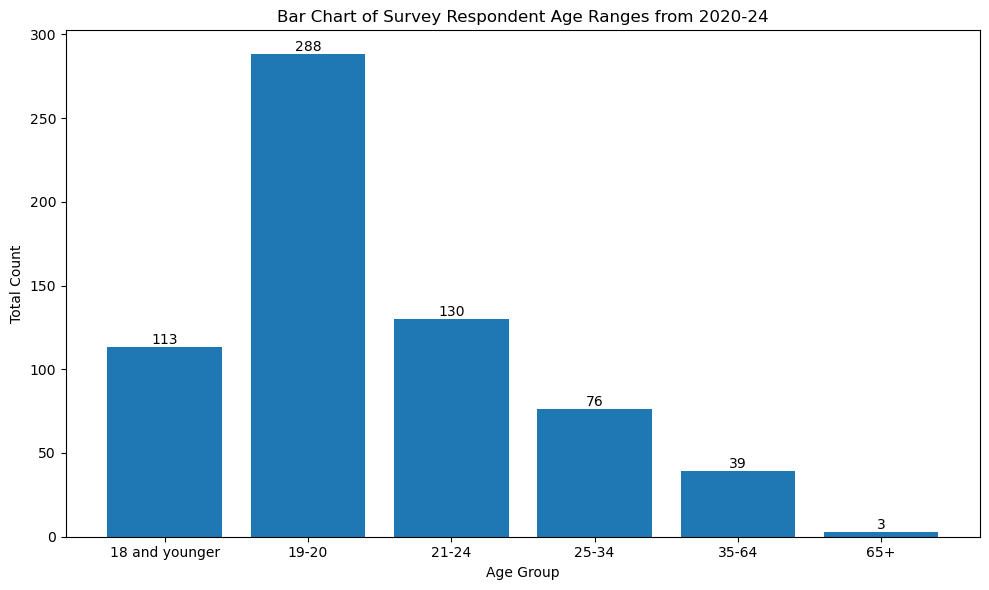

In [1691]:
# Determine counts by years
age_count_sum = age_count.sum(axis=0)  # Sum across rows (years) for each age group

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar chart
bars = plt.bar(
    age_count_sum.index, 
    age_count_sum.values
)

# NOTE: AI (MS Copilot) used for the code block to add count values to the top of each bar. 
# Add count values on top of each bar
for bar in bars:
    height = bar.get_height() # Get the height of the bar (count value).
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x-coordinate (center of the bar)
        height,                            # y-coordinate (top of the bar)
        f'{int(height)}',                  # Text to display (integer count)
        ha = 'center',                     # Horizontal alignment
        va = 'bottom'                      # Vertical alignment
    )
    
# Add labels, title, etc.
plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.title('Bar Chart of Survey Respondent Age Ranges from 2020-24')
plt.tight_layout()

# Save and display chart
plt.savefig('pt16 - Age Ranges - Pie Chart.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Pie Chart of Age Ranges from 2020-24

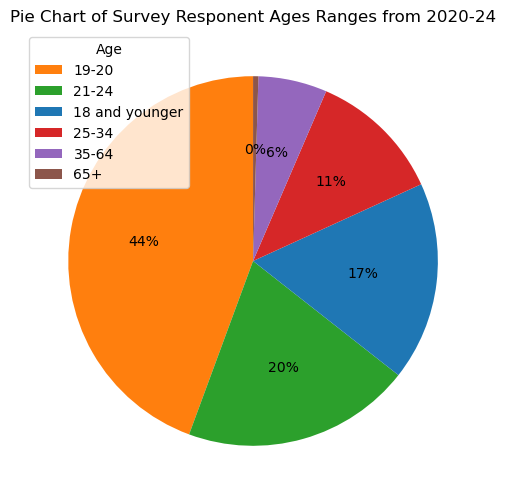

In [1692]:
# Set Plot dimensions
plt.figure(figsize = (10, 6))

# NOTE: AI (MS Copilot) was used to generate the legend using "wedges" AND to order and duplicate colors to match the following plots by category.

# Create pie plot. 
wedges, texts, autotexts = plt.pie(
    survey['age'].value_counts(),
    autopct = '%1d%%',
    startangle = 90,
    colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#9467bd', '#8c564b'] # Orange, Green, Blue, Red, Purple, Brown ... to match bar charts below
)    

# Set labels, titles, etc.
plt.legend(
    handles = wedges,
    labels = list(survey['age'].value_counts().index),
    title = 'Age'
)
plt.title('Pie Chart of Survey Responent Ages Ranges from 2020-24')

# Save and display plot
plt.savefig('pt16 - Age Ranges - Pie Chart.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Clustered Bar Chart of Age Range by Year

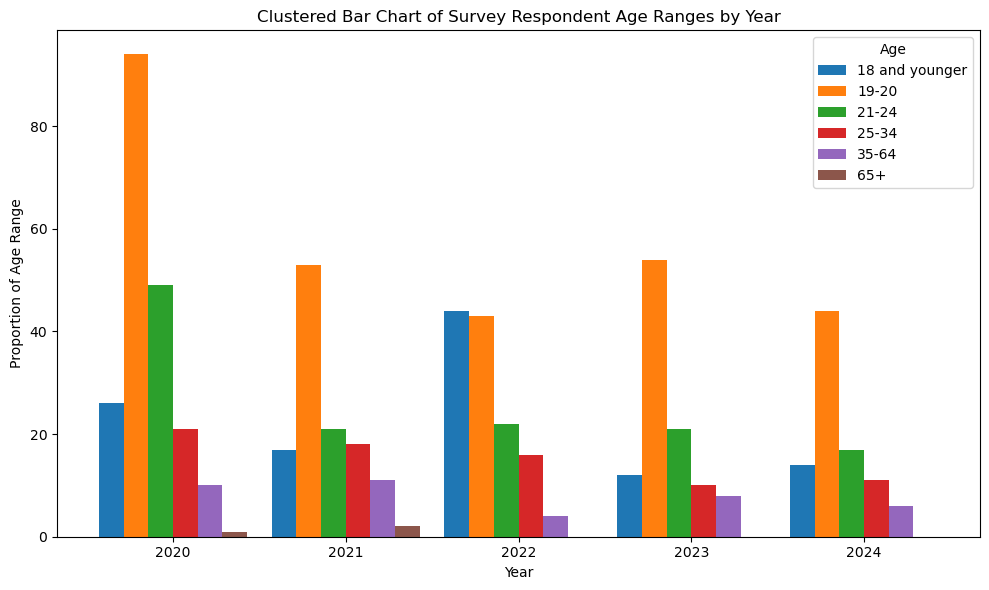

In [1693]:
# Used AI (MS Copilot) to create a Stacked Bar Chart by Year based on above Bar Chart. Bar chart code provided with prompt 
# to generate a clustered bar chart with addition of 'year' field. Multiple prompts, trial and error to simplify to something  
# understandable by the author.

# Group by Year and Age
age_count = survey.groupby(['year', 'age']).size().unstack(fill_value=0)  # Create DataFrame

# Set Plot dimensions
plt.figure(figsize=(10, 6))

# Extract categories and counts
years = age_count.index
age_ranges = age_count.columns
bar_width = 0.025  # Width of each bar
spacing = 0.025    # Gap between clusters
x = np.arange(len(years)) * (0.15 + spacing)  # Base x positions for each year

# Plot each age range as a separate cluster
for i, age_range in enumerate(age_ranges):
    plt.bar(x + i * bar_width, age_count[age_range], width=bar_width, label=str(age_range))

# Set labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Proportion of Age Range')
plt.xticks(x + bar_width * (len(age_ranges) - 1) / 2, years)  # Center the x-ticks
plt.legend(title='Age')
plt.title('Clustered Bar Chart of Survey Respondent Age Ranges by Year')
plt.tight_layout()

# Save and show the chart
plt.savefig('pt16 - Age Ranges by Year - Clustered Bar.jpg', format='jpg')
plt.show()


##### Stacked Bar Chart of Age Range by Year

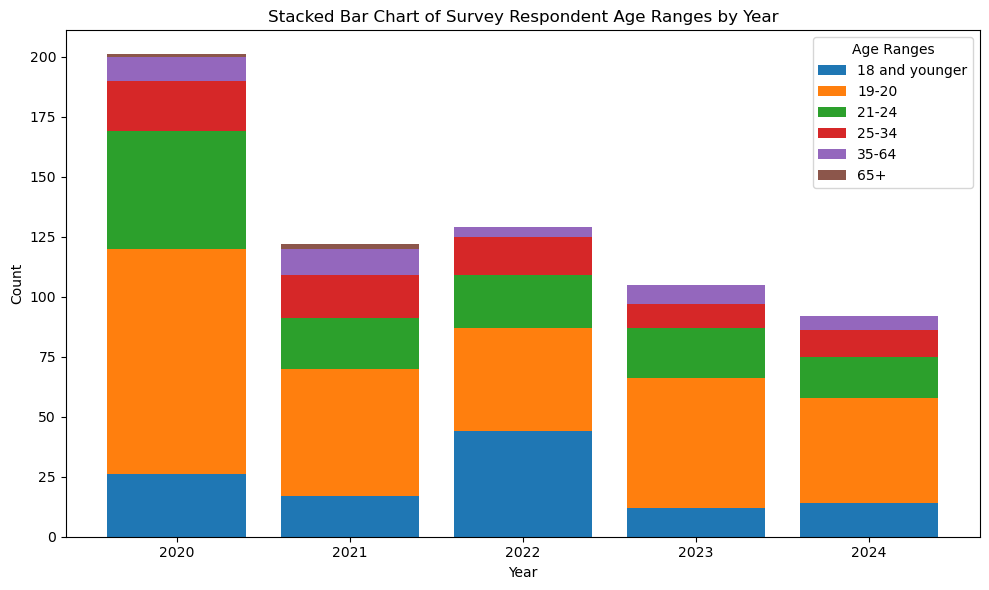

In [1694]:
# Used AI (MS Copilot) to create a Stacked Bar Chart by Year based on above Bar Chart. Bar chart code provided with prompt 
# to generate a clustered bar chart with addition of 'year' field. Multiple prompts, trial and error to simplify to something  
# understandable by the author.

# Set up plot dimensions
plt.figure(figsize=(10, 6))

# Extract years and age ranges
years = age_count.index  # X-axis labels (e.g., years)
age_ranges = age_count.columns  # Categories (e.g., age groups)

# Initialize the bottom position for stacking
bottom_values = np.zeros(len(years))  # Start stacking from 0

# Plot each age group
for age_range in age_ranges:
    plt.bar(
        years,  # X-axis positions
        age_count[age_range],  # Heights of the bars
        bottom=bottom_values,  # Start stacking from the previous bar height
        label=str(age_range)  # Label for legend
    )
    bottom_values += age_count[age_range]  # Update bottom position for stacking

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Survey Respondent Age Ranges by Year')
plt.legend(title='Age Ranges')

# Save and show the plot
plt.tight_layout()
plt.savefig('pt16 - Age Ranges by Year - Stacked Bar.jpg', format='jpg')
plt.show()

##### Proportional Stacked Bar Chart of Age Range by Year

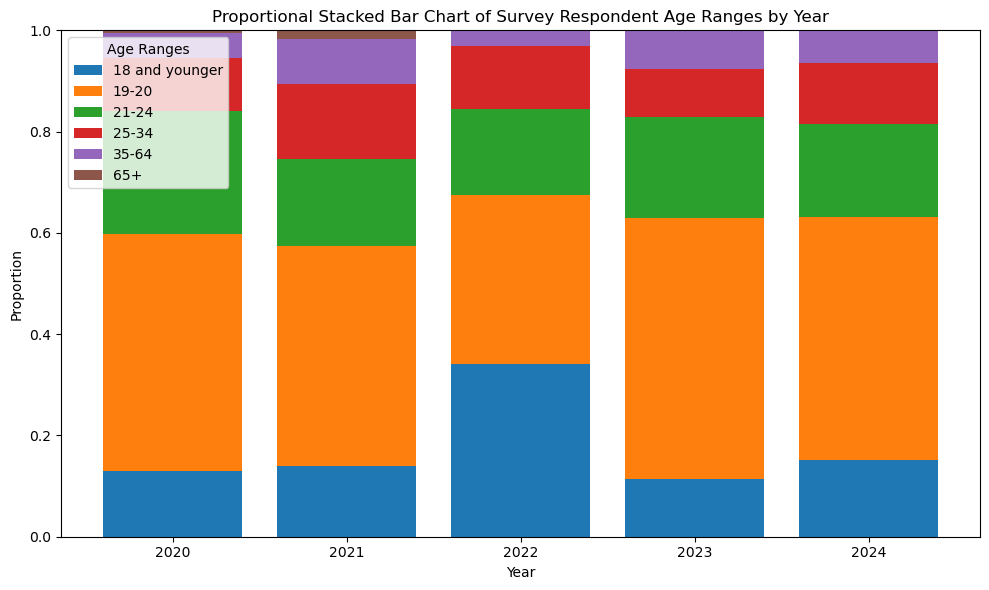

In [1695]:
# Used AI (MS Copilot) to create a Proportional Stacked Bar Chart by Year based on above Stacked Bar Chart. Stacked Bar  
# chart code provided with promptto generate a clustered bar chart with addition of 'year' field. Multiple prompts, trial   
# and error to simplify to something understandable by the author.

# Group by Year and Age
age_count = survey.groupby(['year', 'age']).size().unstack(fill_value=0)  # Create DataFrame

# Calculate proportions for each age range by dividing each count by the row's total
age_count_proportions = age_count.div(age_count.sum(axis=1), axis=0)

# Set up plot dimensions
plt.figure(figsize=(10, 6))

# Extract years and age ranges
years = age_count_proportions.index  # X-axis labels (years)
age_ranges = age_count_proportions.columns  # Categories (age groups)

# Initialize the bottom position for stacking
bottom_values = np.zeros(len(years))  # Start stacking from 0

# Plot each age group as a stacked bar
for age_range in age_ranges:
    plt.bar(
        years,  # X-axis positions
        age_count_proportions[age_range],  # Heights of the bars (proportions)
        bottom=bottom_values,  # Start stacking from the previous bar height
        label=str(age_range)  # Label for legend
    )
    bottom_values += age_count_proportions[age_range]  # Update bottom for next group

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportional Stacked Bar Chart of Survey Respondent Age Ranges by Year')
plt.legend(title='Age Ranges', loc='upper left')

# Save and show the chart
plt.tight_layout()
plt.savefig('pt16 - Age Ranges by Year - Proportional Stacked Bar.jpg', format='jpg')
plt.show()

#### Conclusions from Part 16: Data Analysis - What are the changes over time (2020-24) in age demographics?
Some observations can be made:
* Overall, the **number of responses to the survey have gone down year-to-year from 2020 to 2024, with a slight spike in 2022**. It might be worth investigating what, if anything, happened in 2022 that could explain this spike. 
* From 2020 through 2024, the number of respondents from each age group follows, from largest to smallest:
    * 19-20 (Count = 288, 44%)
    * 21-24 (Count = 130, 20%)
    * 18 and younger (Count = 113, 17%)
    * 25-34 (Count = 76, 11%)
    * 34-64 (Count = 39, 6%)
    * 65+ (Count = 3, 0%)
* The **ordering of age ranges year-to-year consistently matches the ordering across the entire duration**. There was **one exception to this in 2022**, where '18 and younger' tied '19-20' year-olds, beating out '21-24' year-olds for second place. This likely contributed to the overall spike that year. I'd be curious to know if there was a special initiative that targeted students aged '18 and younger' in 2022.  

### Part 17: Data Analysis - What non-CMP degree/programs have the highest occurrence of respondents taking a Computer Literacy Course? Conversely, what are the least?
To get an understanding of what non-CMP majors/programs survey respondents belong to, we will make two charts based on the count of each age range, by year:
* Bar Chart: Non-CMP Degrees Enrolled in CMP Courses from 2020-24  
* Pie Chart: Non-CMP Degrees Enrolled in CMP Courses from 2020-24  

#### Bar Chart: Non-CMP Degrees Enrolled in CMP Courses

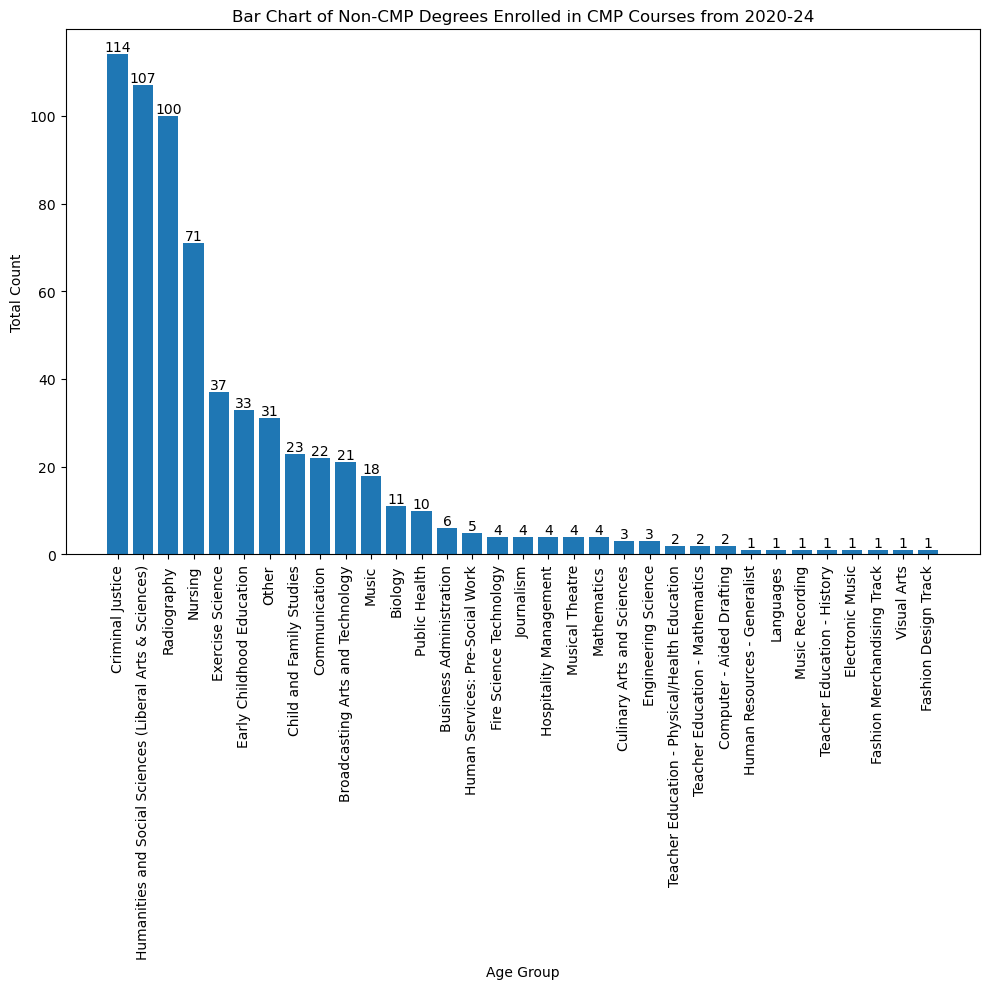

In [1696]:
# NOTE: Using Bar Chart in Part 14 as a template.

# Set plot size
plt.figure(figsize=(10, 10))

# Create bar chart
bars = plt.bar(
    survey['degreeenrolled'].value_counts().index, 
    survey['degreeenrolled'].value_counts().values
)

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height() # Get the height of the bar (count value).
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x-coordinate (center of the bar)
        height,                            # y-coordinate (top of the bar)
        f'{int(height)}',                  # Text to display (integer count)
        ha = 'center',                     # Horizontal alignment
        va = 'bottom'                      # Vertical alignment
    )

# Add labels, title, etc.
plt.xticks(rotation = 90)     # Rotate x axis labels 90 degrees
plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.title('Bar Chart of Non-CMP Degrees Enrolled in CMP Courses from 2020-24')
plt.tight_layout()

# Save and display chart
plt.savefig('pt17 - Degrees Enrolled - Bar Chart.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Pie Chart: Non-CMP Degrees Enrolled in CMP Courses

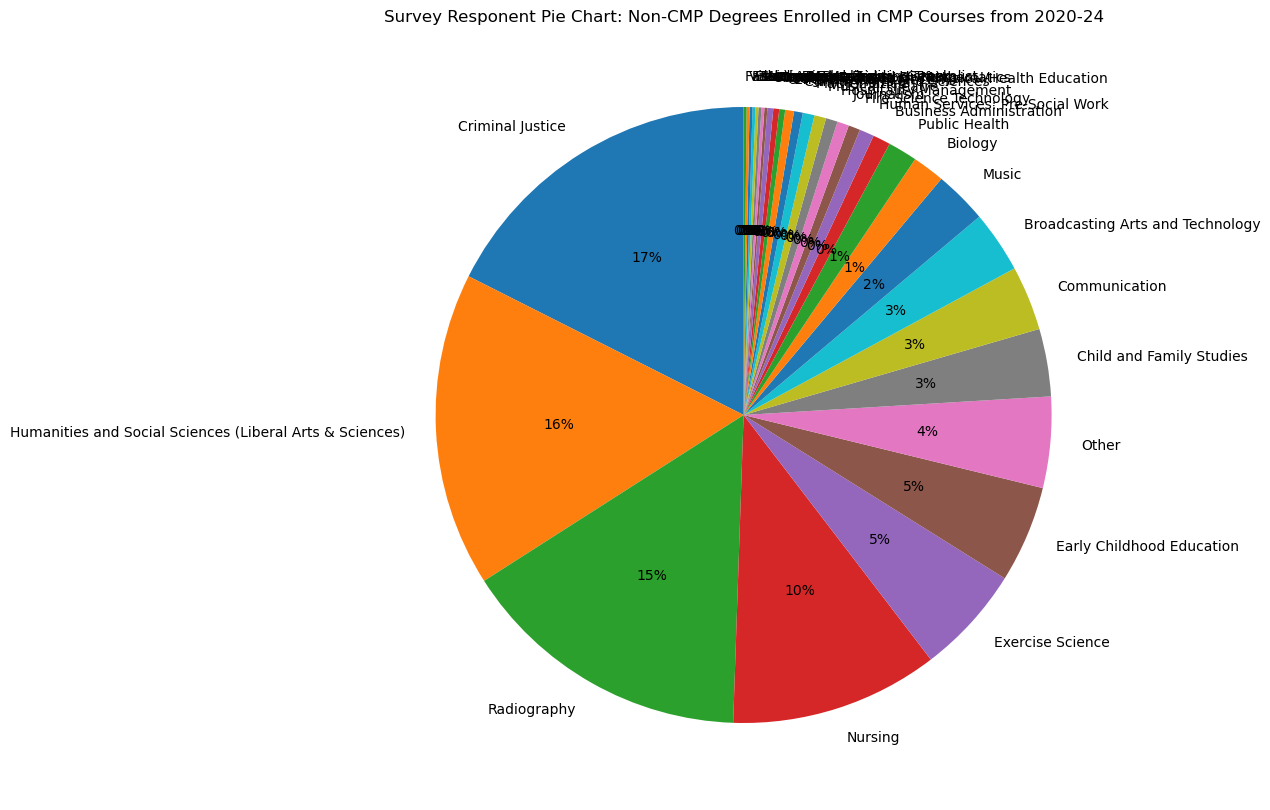

In [1697]:
# NOTE: Using Pie Chart in Part 14 as a template.

# Set Plot dimensions
plt.figure(figsize = (10, 10))

# Create pie plot. 
wedges, texts, autotexts = plt.pie(
    survey['degreeenrolled'].value_counts(). values,
    labels = survey['degreeenrolled'].value_counts().index,
    autopct = '%1d%%',
    startangle = 90#,
    #colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#9467bd', '#8c564b'] # Orange, Green, Blue, Red, Purple, Brown ... to match bar charts below
)    

# Set labels, titles, etc.
plt.title('Survey Responent Pie Chart: Non-CMP Degrees Enrolled in CMP Courses from 2020-24')

# Save and display plot
plt.savefig('pt17 - Degrees Enrolled - Pie Chart.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Conclusions from Part 17: Data Analysis - What non-CMP degree/programs have the highest occurrences of respondents taking a Computer Literacy Course? Conversely, what are the least?
* Non-CMP enrolled survey respondents reported being enrolled in the following TOP 5 Degrees between 2020 & 2024:
    1. Criminal Justice (Count = 114, 17%)
    2. Humanities and Social Sciences (Liberal Arts & Sciences) (Count = 107, 16%)
    3. Radiography (Count = 100, 15%)
    4. Nursing (Count = 71, 10%)
    5. Exercise Science (Count = 37, 5%)
* Non-CMP enrolled survey respondents reported being enrolled in the following BOTTOM 8 Degrees (all tied with a count of 1 each) between 2020 & 2024:
    1. Human Resources - Generalist 
    2. Languages
    3. Music Recording
    4. Teacher Education - History
    5. Electronic Music
    6. Fashion Merchandising Track
    7. Visual Arts
    8. Fashion Design Track
* The **top 5 degrees make up ~63% of the responses**.
* The **bottom 9 degrees had only 1 response each** over the 2020-24 duration, totaling across all 8,  just over 1% of the responses.  

### Part 18: Data Analysis - What are the most effective information sources for non-CMP respondents seeking additional Computer Science courses? Conversely, what are the least?
To get an understanding of and draw conclusions about the information sources, we generate and evaluate the following visualizations:
* Bar Chart - Sources of Information Reported by non-CMP Respondents across 2020-24.
* Pie Chart - Sources of Information Reported by non-CMP Respondents across 2020-24.
* Clustered Bar Chart - Sources of Information Reported by non-CMP Respondents by Year (2020-24).
* Stacked Bar Chart - Sources of Information Reported by non-CMP Respondents by Year (2020-24).
* Proportional Stacked Bar Chart - Sources of Information Reported by non-CMP Respondents by Year (2020-24).  

#### Bar Chart: Sources of Information Reported by Non-CMP Respondents

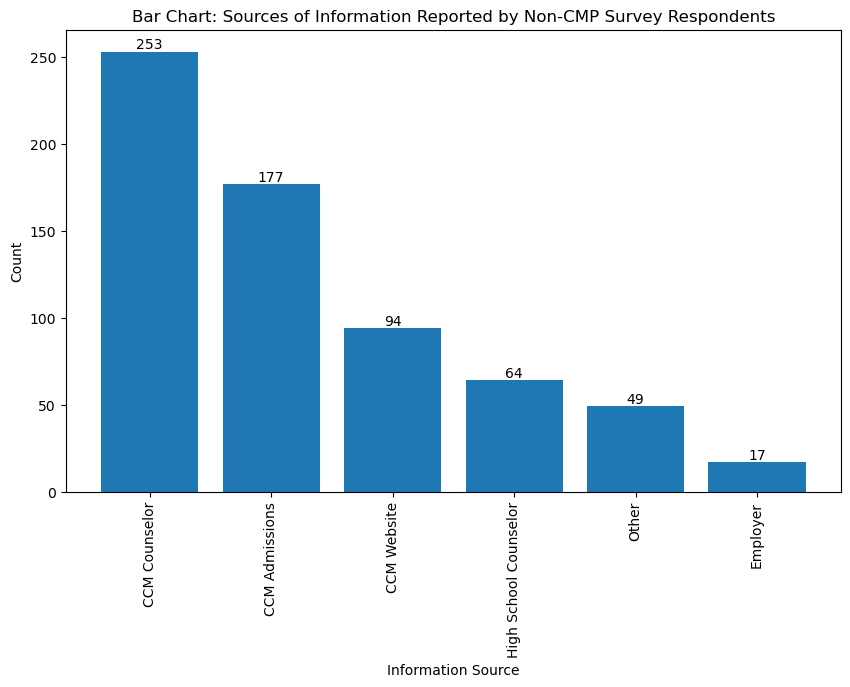

In [1698]:
# NOTE: AI (MS Coplilot) used given generic prompt of having 6 columns of 'yes/no' values, and want a bar chart where each bar 
# in the chart is the count of 'yes' values for each dataframe column. Multiple prompts, trial and error to simplify to something  
# understandable by the author.

# Create 'yes_counts' panda series having count of 'Yes' from each column.
yes_counts = (survey[[
    'infosource_hscounselor', 
    'infosource_ccmwebsite', 
    'infosource_ccmadmissions', 
    'infosource_ccmcounselor', 
    'infosource_employer', 
    'infosource_other'
]] == 'Yes').sum()

# Rename index labels of panda series to labels that can be used in plot output.
yes_counts = yes_counts.rename({
    'infosource_hscounselor': 'High School Counselor',
    'infosource_ccmwebsite': 'CCM Website',
    'infosource_ccmadmissions': 'CCM Admissions',
    'infosource_ccmcounselor': 'CCM Counselor',
    'infosource_employer': 'Employer',
    'infosource_other': 'Other'
})

# Order the series descending.
yes_counts = yes_counts.sort_values(ascending = False)

# Set Plot dimensions
plt.figure(figsize = (10, 6))

# Bar Chart of yes_counts.
bars = plt.bar(
    yes_counts.index,
    yes_counts.values
)

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height() # Get the height of the bar (count value).
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x-coordinate (center of the bar)
        height,                            # y-coordinate (top of the bar)
        f'{int(height)}',                  # Text to display (integer count)
        ha = 'center',                     # Horizontal alignment
        va = 'bottom'                      # Vertical alignment
    )

# Set lables, titles, etc.
plt.xlabel('Information Source')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Bar Chart: Sources of Information Reported by Non-CMP Survey Respondents')

# Save and display plot
plt.savefig('pt18 - Info Sources - Bar Chart.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Pie Chart: Sources of Information Reported by Non-CMP Respondents between 2020-24

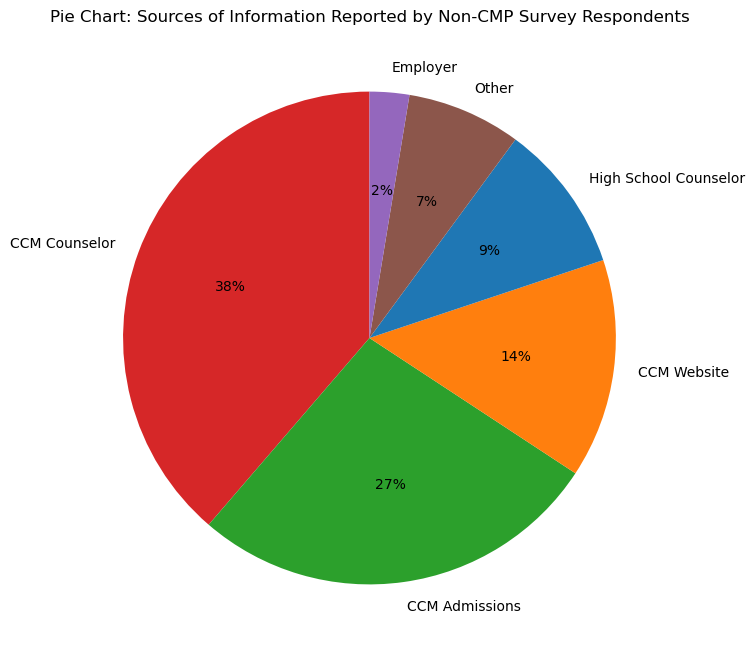

In [1699]:
# Create 'yes_counts' panda series having count of 'Yes' from each column.
yes_counts = (survey[[
    'infosource_hscounselor', 
    'infosource_ccmwebsite', 
    'infosource_ccmadmissions', 
    'infosource_ccmcounselor', 
    'infosource_employer', 
    'infosource_other'
]] == 'Yes').sum()

# Rename index labels of panda series to labels that can be used in plot output.
yes_counts = yes_counts.rename({
    'infosource_hscounselor': 'High School Counselor',
    'infosource_ccmwebsite': 'CCM Website',
    'infosource_ccmadmissions': 'CCM Admissions',
    'infosource_ccmcounselor': 'CCM Counselor',
    'infosource_employer': 'Employer',
    'infosource_other': 'Other'
})

# NOTE: AI (MS Coplilot) used given generic prompt of having 6 columns of 'yes/no' values, and want a pie chart where each  
# slice in the chart is the count of 'yes' values for each dataframe column. Multiple prompts, trial and error to simplify   
# to something understandable by the author.

# Order the series descending.
yes_counts = yes_counts.sort_values(ascending = False)

# Set plot dimensions
plt.figure(figsize=(8, 8))

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    yes_counts.values,           # Values for pie chart
    labels=yes_counts.index,     # Labels for each slice
    autopct='%1d%%',             # Display percentages
    startangle=90,               # Start angle for the chart
    colors = ['#d62728', '#2ca02c', '#ff7f0e', '#1f77b4', '#8c564b', '#9467bd'] # Red, Green, Orange, Blue, Brown & Purple  ... to match bar charts below
)

# Add a title
plt.title('Pie Chart: Sources of Information Reported by Non-CMP Survey Respondents')

# Save and display the chart
plt.savefig('pt18 - Info Sources - Pie Chart.jpg', format='jpg')  # Save the plot
plt.show()

#### Clustered Bar Chart: Sources of Information Reported by Non-SMP Respondents by Year

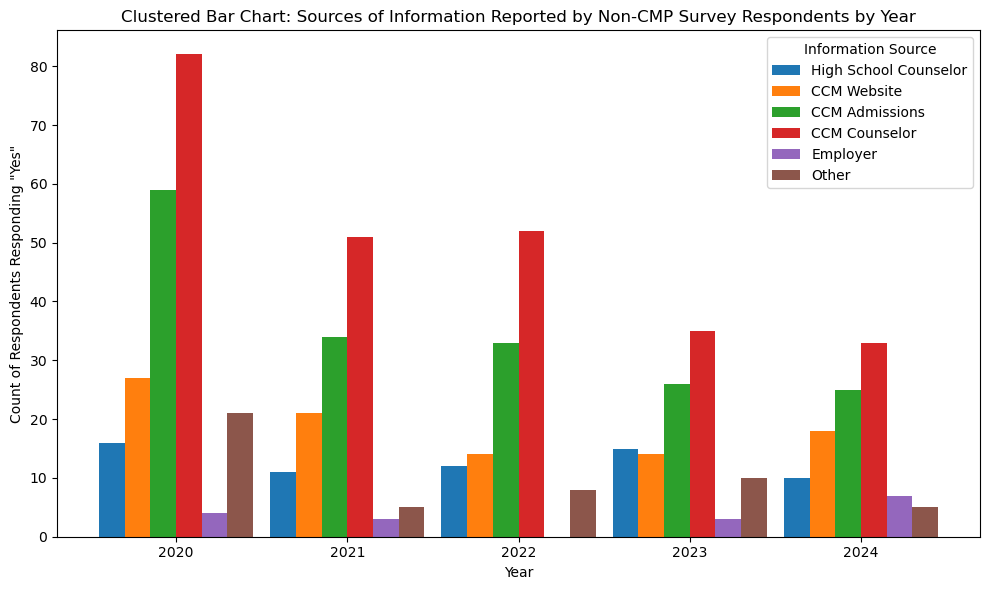

In [1700]:
# Create 'yes_counts' dataframe having count of 'Yes' from each column
yes_counts = survey[[
    'year',
    'infosource_hscounselor', 
    'infosource_ccmwebsite', 
    'infosource_ccmadmissions', 
    'infosource_ccmcounselor', 
    'infosource_employer', 
    'infosource_other'
]].copy()

# Create INT columns representing yes/no with column labels that will be used in chart. 
yes_counts['High School Counselor'] = np.where(yes_counts['infosource_hscounselor'] == 'Yes', 1, 0)
yes_counts['CCM Website'] = np.where(yes_counts['infosource_ccmwebsite'] == 'Yes', 1, 0)
yes_counts['CCM Admissions'] = np.where(yes_counts['infosource_ccmadmissions'] == 'Yes', 1, 0)
yes_counts['CCM Counselor'] = np.where(yes_counts['infosource_ccmcounselor'] == 'Yes', 1, 0)
yes_counts['Employer'] = np.where(yes_counts['infosource_employer'] == 'Yes', 1, 0)
yes_counts['Other'] = np.where(yes_counts['infosource_other'] == 'Yes', 1, 0)

# Remove source columns.
yes_counts = yes_counts.drop('infosource_hscounselor', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmwebsite', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmadmissions', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmcounselor', axis = 1)
yes_counts = yes_counts.drop('infosource_employer', axis = 1)
yes_counts = yes_counts.drop('infosource_other', axis = 1)

# Rename 'Year' column.
yes_counts = yes_counts.rename(columns = {
    'year': 'Year'
})

# NOTE: AI (MS Coplilot) used given the Bar Chart for multiple columns above to generate a clustered bar
# chart. Multiple prompts, trial and error to simplify to something understandable by the author.

# Group by 'Year' 
grouped = yes_counts.groupby('Year').sum()

# Define x-axist positions
years = grouped.index
categories = grouped.columns
bar_width = 0.15       # Width of each bar
x = np.arange(len(years))  # Base x positions for clusters

# Plot each column as a separate bar in the cluster
plt.figure(figsize = (10, 6))
for i, category in enumerate(categories):
    plt.bar(
        x + i * bar_width, 
        grouped[category],
        width = bar_width,
        label = category
    )

# Add labels, legend and title.
plt.xlabel('Year')
plt.ylabel('Count of Respondents Responding "Yes"')
plt.title('Clustered Bar Chart: Sources of Information Reported by Non-CMP Survey Respondents by Year')
plt.xticks(x + bar_width * (len(categories) - 1) / 2, years)  # Center the ticks
plt.legend(title = 'Information Source')

# Display and output Chart
plt.tight_layout()
plt.savefig('pt18 - Info Sources - Clustered Bar Chart by Year.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Stacked Bar Chart: Sources of Information Reported by Non-CMP Respondents by Year

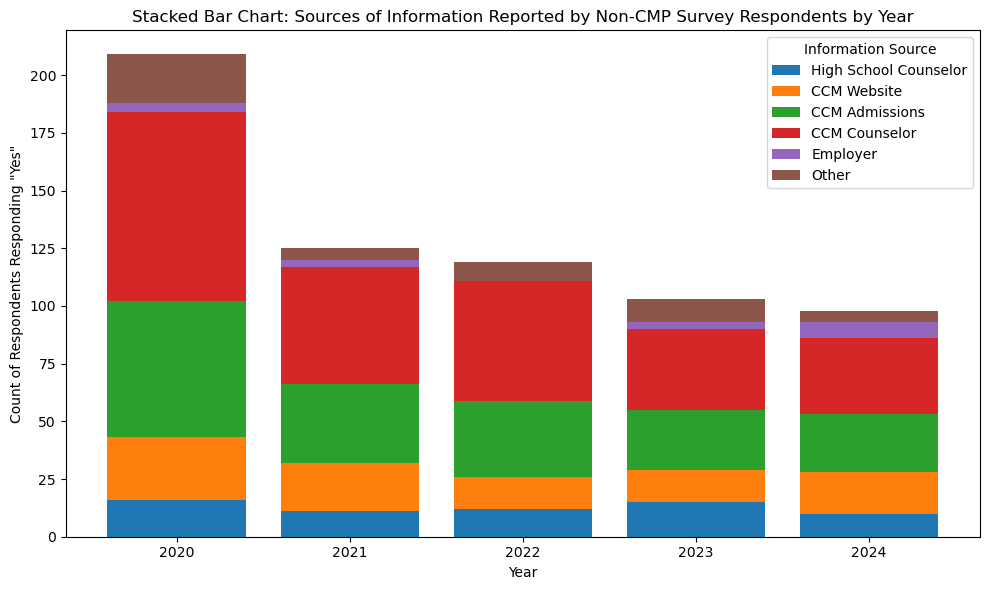

In [1701]:
# Create 'yes_counts' dataframe having count of 'Yes' from each column
yes_counts = survey[[
    'year',
    'infosource_hscounselor', 
    'infosource_ccmwebsite', 
    'infosource_ccmadmissions', 
    'infosource_ccmcounselor', 
    'infosource_employer', 
    'infosource_other'
]].copy()

# Create INT columns representing yes/no with column labels that will be used in chart. 
yes_counts['High School Counselor'] = np.where(yes_counts['infosource_hscounselor'] == 'Yes', 1, 0)
yes_counts['CCM Website'] = np.where(yes_counts['infosource_ccmwebsite'] == 'Yes', 1, 0)
yes_counts['CCM Admissions'] = np.where(yes_counts['infosource_ccmadmissions'] == 'Yes', 1, 0)
yes_counts['CCM Counselor'] = np.where(yes_counts['infosource_ccmcounselor'] == 'Yes', 1, 0)
yes_counts['Employer'] = np.where(yes_counts['infosource_employer'] == 'Yes', 1, 0)
yes_counts['Other'] = np.where(yes_counts['infosource_other'] == 'Yes', 1, 0)

# Remove source columns.
yes_counts = yes_counts.drop('infosource_hscounselor', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmwebsite', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmadmissions', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmcounselor', axis = 1)
yes_counts = yes_counts.drop('infosource_employer', axis = 1)
yes_counts = yes_counts.drop('infosource_other', axis = 1)

# Rename 'Year' column.
yes_counts = yes_counts.rename(columns = {
    'year': 'Year'
})

# NOTE: AI (MS Coplilot) used given the Bar Chart for multiple columns above to generate a stacked bar
# chart. Multiple prompts, trial and error to simplify to something understandable by the author.

# Group by 'Year'
grouped = yes_counts.groupby('Year').sum()

# Define x-axis positions and categories
years = grouped.index
categories = grouped.columns

# Initialize bottom values for stacking
bottom_values = np.zeros(len(years))  # Start stacking from 0 for all years

# Set up plot size
plt.figure(figsize=(10, 6))

# Loop through each category and add it to the stacked bar chart
for category in categories:
    plt.bar(
        years,                       # X-axis (years remain the same)
        grouped[category],           # Heights of the current stack
        bottom=bottom_values,        # Start stacking on top of previous bars
        label=category               # Label for the legend
    )
    # Update the bottom values for stacking the next category
    bottom_values += grouped[category]

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Count of Respondents Responding "Yes"')
plt.title('Stacked Bar Chart: Sources of Information Reported by Non-CMP Survey Respondents by Year')
plt.legend(title='Information Source', loc='upper right')  # Position legend at the top left

# Display and output the chart
plt.tight_layout()
plt.savefig('pt18 - Info Sources - Stacked Bar Chart by Year.jpg', format='jpg')  # Save plot to file
plt.show()

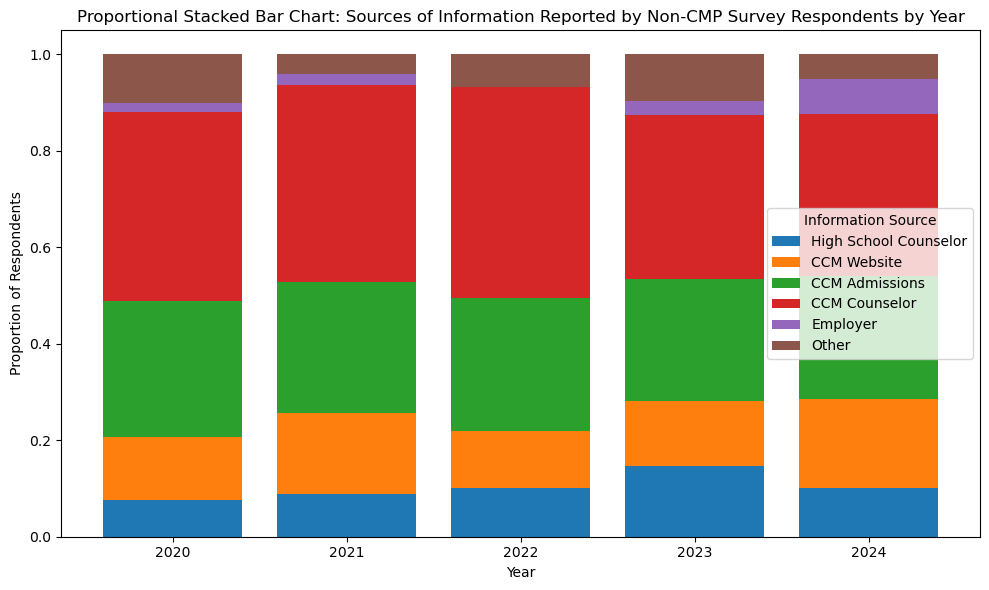

In [1702]:
# Create 'yes_counts' dataframe having count of 'Yes' from each column
yes_counts = survey[[
    'year',
    'infosource_hscounselor', 
    'infosource_ccmwebsite', 
    'infosource_ccmadmissions', 
    'infosource_ccmcounselor', 
    'infosource_employer', 
    'infosource_other'
]].copy()

# Create INT columns representing yes/no with column labels that will be used in chart. 
yes_counts['High School Counselor'] = np.where(yes_counts['infosource_hscounselor'] == 'Yes', 1, 0)
yes_counts['CCM Website'] = np.where(yes_counts['infosource_ccmwebsite'] == 'Yes', 1, 0)
yes_counts['CCM Admissions'] = np.where(yes_counts['infosource_ccmadmissions'] == 'Yes', 1, 0)
yes_counts['CCM Counselor'] = np.where(yes_counts['infosource_ccmcounselor'] == 'Yes', 1, 0)
yes_counts['Employer'] = np.where(yes_counts['infosource_employer'] == 'Yes', 1, 0)
yes_counts['Other'] = np.where(yes_counts['infosource_other'] == 'Yes', 1, 0)

# Remove source columns.
yes_counts = yes_counts.drop('infosource_hscounselor', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmwebsite', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmadmissions', axis = 1)
yes_counts = yes_counts.drop('infosource_ccmcounselor', axis = 1)
yes_counts = yes_counts.drop('infosource_employer', axis = 1)
yes_counts = yes_counts.drop('infosource_other', axis = 1)

# Rename 'Year' column.
yes_counts = yes_counts.rename(columns = {
    'year': 'Year'
})

# NOTE: AI (MS Coplilot) used given the Stacked Bar Chart for multiple columns above to generate a 
# proportional stacked bar chart. Multiple iterations prompts, trial and error to simplify to something  
# understandable by the author.

# Group by 'Year'
grouped = yes_counts.groupby('Year').sum()

# Convert counts to proportions by dividing each value by the row's total
grouped_proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Define x-axis positions and categories
years = grouped_proportions.index
categories = grouped_proportions.columns

# Initialize bottom values for stacking
bottom_values = np.zeros(len(years))  # Start stacking from 0 for all years

# Set up plot size
plt.figure(figsize=(10, 6))

# Loop through each category and add it to the proportional stacked bar chart
for category in categories:
    plt.bar(
        years,                            # X-axis (years remain the same)
        grouped_proportions[category],    # Heights of the current stack (proportions)
        bottom=bottom_values,             # Start stacking on top of previous bars
        label=category                    # Label for the legend
    )
    # Update the bottom values for stacking the next category
    bottom_values += grouped_proportions[category]

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Proportion of Respondents')
plt.title('Proportional Stacked Bar Chart: Sources of Information Reported by Non-CMP Survey Respondents by Year')
plt.legend(title='Information Source', loc='center right')  # Position legend at the top right

# Display and output the chart
plt.tight_layout()
plt.savefig('pt18 - Info Sources - Proportional Stacked Bar Chart by Year.jpg', format='jpg')  # Save plot to file
plt.show()

### Conclusions from Part 18: Data Analysis - What are the most effective information sources for non-CMP respondents seeking additional Computer Science courses? Conversely, what are the least?
* Non-CMP enrolled survey respondents reported the following sources of information, from most reported to least:
    1. CCM Counselor (Count = 253, 38%)
    2. CCM Admissions (Count = 177, 27%)
    3. CCM Website (Count = 94, 14%)
    4. High School Counselor (Count = 64, 9%)
    5. Other (Count = 49, 7%)
    6. Employer (Count = 17, 2%)
* The rank order of the Information Sources remained relatively constant year-to-year, except for 2024 when 'Employer' edged out 'Other'. These were the lowest two Information Sources so there was little impact.  

### Part 19: Data Analysis - What interests are survey respondents seeking the most? Conversely, what are the least?
To get an understanding of and draw conclusions about the respondent's interests, we generate and evaluate the following visualizations:
* Bar Chart - Interests Reported by non-CMP Respondents across 2020-24.
* Pie Chart - Interests Reported by non-CMP Respondents across 2020-24.
* Clustered Bar Chart - Interests Reported by non-CMP Respondents by Year (2020-24).
* Stacked Bar Chart - Interests Reported by non-CMP Respondents by Year (2020-24).
* Proportional Stacked Bar Chart - Interests Reported by non-CMP Respondents by Year (2020-24).  

#### Bar Chart - Interests Reported by Non-CMP Respondents across 2020-24

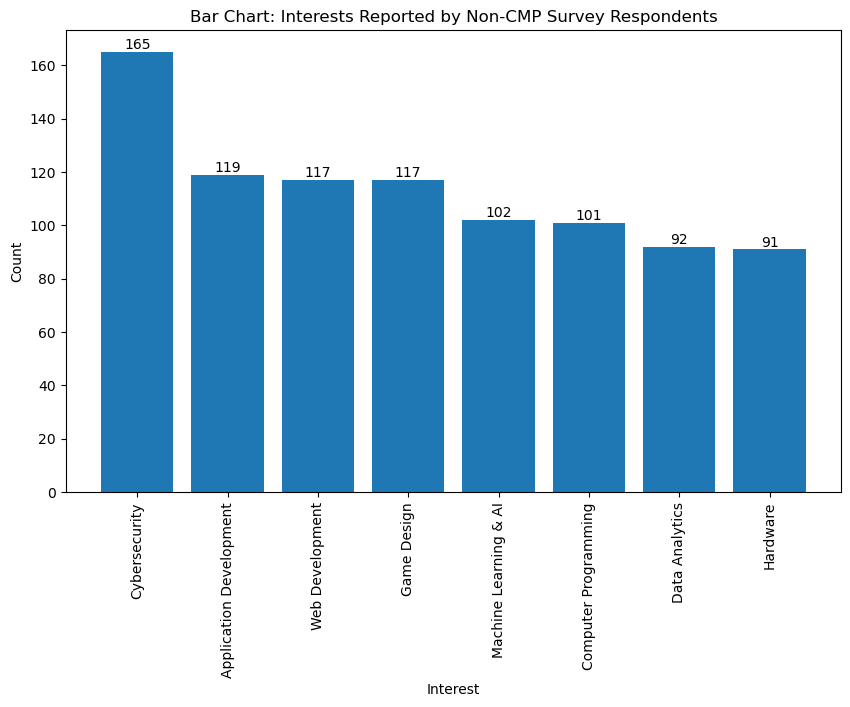

In [1703]:
# NOTE: Using Bar Chart from Part 18 above as a template.

# Create 'yes_counts' panda series having count of 'Yes' from each column.
yes_counts = (survey[[
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog',
    'interest_gamedes',
    'interest_hardware'
]] == 'Yes').sum()

# Rename index labels of panda series to labels that can be used in plot output.
yes_counts = yes_counts.rename({
    'interest_webdev': 'Web Development',
    'interest_cybersec': 'Cybersecurity',
    'interest_appdev': 'Application Development',
    'interest_dataanalytics': 'Data Analytics',
    'interest_mlai': 'Machine Learning & AI',
    'interest_compprog': 'Computer Programming',
    'interest_gamedes': 'Game Design',
    'interest_hardware': 'Hardware'
})

# Order the series descending.
yes_counts = yes_counts.sort_values(ascending = False)

# Set Plot dimensions
plt.figure(figsize = (10, 6))

# Bar Chart of yes_counts.
bars = plt.bar(
    yes_counts.index,
    yes_counts.values
)

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height() # Get the height of the bar (count value).
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x-coordinate (center of the bar)
        height,                            # y-coordinate (top of the bar)
        f'{int(height)}',                  # Text to display (integer count)
        ha = 'center',                     # Horizontal alignment
        va = 'bottom'                      # Vertical alignment
    )
    
# Set lables, titles, etc.
plt.xlabel('Interest')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Bar Chart: Interests Reported by Non-CMP Survey Respondents')

# Save and display plot
plt.savefig('pt19 - Interests - Bar Chart.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Pie Chart - Interests Reported by Non-CMP Respondents across 2020-24

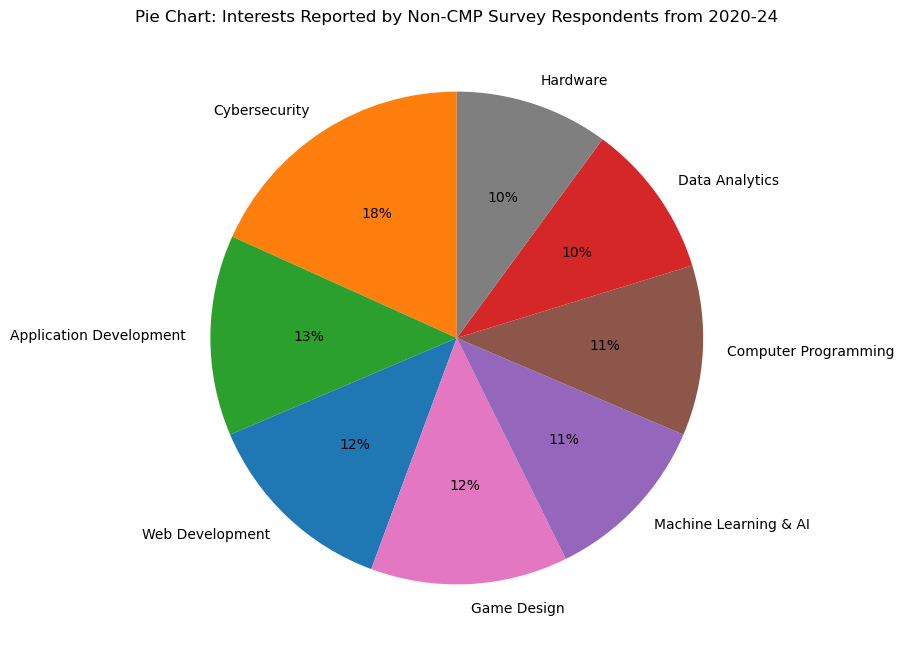

In [1704]:
# NOTE: Used pie chart in section 18 as a template for this chart.

# Create 'yes_counts' panda series having count of 'Yes' from each column.
yes_counts = (survey[[
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog',
    'interest_gamedes',
    'interest_hardware'
]] == 'Yes').sum()

# Rename index labels of panda series to labels that can be used in plot output.
yes_counts = yes_counts.rename({
    'interest_webdev': 'Web Development',
    'interest_cybersec': 'Cybersecurity',
    'interest_appdev': 'Application Development',
    'interest_dataanalytics': 'Data Analytics',
    'interest_mlai': 'Machine Learning & AI',
    'interest_compprog': 'Computer Programming',
    'interest_gamedes': 'Game Design',
    'interest_hardware': 'Hardware'
})

# Order the series descending.
yes_counts = yes_counts.sort_values(ascending = False)

# Set plot dimensions
plt.figure(figsize=(8, 8))

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    yes_counts.values,           # Values for pie chart
    labels=yes_counts.index,     # Labels for each slice
    autopct='%1d%%',             # Display percentages
    startangle=90,               # Start angle for the chart
    colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#e377c2', '#9467bd', '#8c564b', '#d62728', '#7f7f7f'] # Orange, Green, Blue, Pink, Purple, Brown, Red  &  Gray ... to match bar charts below
)

# Add a title
plt.title('Pie Chart: Interests Reported by Non-CMP Survey Respondents from 2020-24')

# Save and display the chart
plt.savefig('pt19 - Interests - Pie Chart.jpg', format='jpg')  # Save the plot
plt.show()

#### Clustered Bar Chart: Interests Reported by Non-SMP Respondents by Year

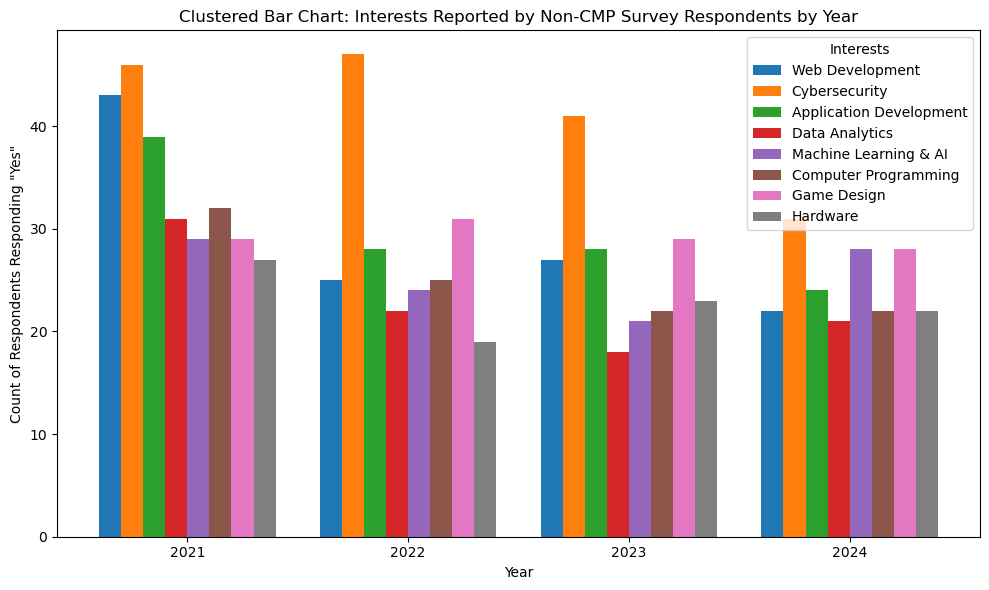

In [1705]:
# NOTE: Used Clustered Bar Chart in part 18 above as a template. 

# Create 'yes_counts' dataframe having count of 'Yes' from each column
yes_counts = survey[[
    'year',
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog',
    'interest_gamedes',
    'interest_hardware'
]].copy()

# Drop rows with NaN values in any of the relevant columns (2020)
yes_counts = yes_counts.dropna(subset=[
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog', 
    'interest_gamedes', 
    'interest_hardware'
])

# Create INT columns representing yes/no with column labels that will be used in chart. 
yes_counts['Web Development'] = np.where(yes_counts['interest_webdev'] == 'Yes', 1, 0)
yes_counts['Cybersecurity'] = np.where(yes_counts['interest_cybersec'] == 'Yes', 1, 0)
yes_counts['Application Development'] = np.where(yes_counts['interest_appdev'] == 'Yes', 1, 0)
yes_counts['Data Analytics'] = np.where(yes_counts['interest_dataanalytics'] == 'Yes', 1, 0)
yes_counts['Machine Learning & AI'] = np.where(yes_counts['interest_mlai'] == 'Yes', 1, 0)
yes_counts['Computer Programming'] = np.where(yes_counts['interest_compprog'] == 'Yes', 1, 0)
yes_counts['Game Design'] = np.where(yes_counts['interest_gamedes'] == 'Yes', 1, 0)
yes_counts['Hardware'] = np.where(yes_counts['interest_hardware'] == 'Yes', 1, 0)

# Remove source columns.
yes_counts = yes_counts.drop('interest_webdev', axis = 1)
yes_counts = yes_counts.drop('interest_cybersec', axis = 1)
yes_counts = yes_counts.drop('interest_appdev', axis = 1)
yes_counts = yes_counts.drop('interest_dataanalytics', axis = 1)
yes_counts = yes_counts.drop('interest_mlai', axis = 1)
yes_counts = yes_counts.drop('interest_compprog', axis = 1)
yes_counts = yes_counts.drop('interest_gamedes', axis = 1)
yes_counts = yes_counts.drop('interest_hardware', axis = 1)

# Rename 'Year' column.
yes_counts = yes_counts.rename(columns = {
    'year': 'Year'
})

# Group by 'Year' 
grouped = yes_counts.groupby('Year').sum()

# Define x-axist positions
years = grouped.index
categories = grouped.columns
bar_width = 0.1       # Width of each bar
x = np.arange(len(years))  # Base x positions for clusters

# Plot each column as a separate bar in the cluster
plt.figure(figsize = (10, 6))
for i, category in enumerate(categories):
    plt.bar(
        x + i * bar_width, 
        grouped[category],
        width = bar_width,
        label = category
    )

# Add labels, legend and title.
plt.xlabel('Year')
plt.ylabel('Count of Respondents Responding "Yes"')
plt.title('Clustered Bar Chart: Interests Reported by Non-CMP Survey Respondents by Year')
plt.xticks(x + bar_width * (len(categories) - 1) / 2, years)  # Center the ticks
plt.legend(title = 'Interests')

# Display and output Chart
plt.tight_layout()
plt.savefig('pt19 - Interests - Clustered Bar Chart by Year.jpg', format = 'jpg')   # Save plot to file
plt.show()

#### Stacked Bar Chart: Interests Reported by Non-SMP Respondents by Year

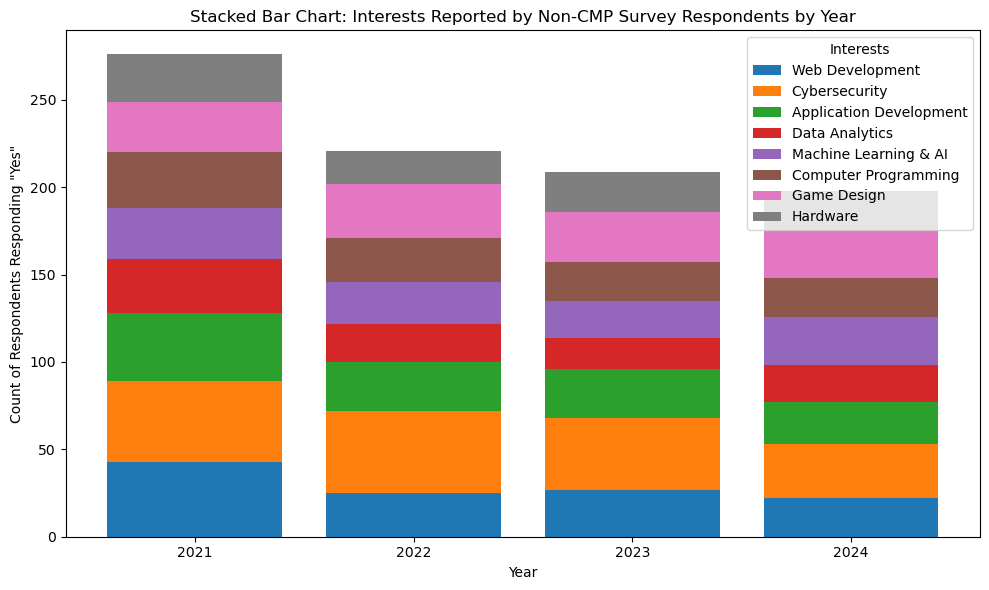

In [1706]:
# NOTE: Used Stacked Bar Chart in part 18 above as a template. 

# Create 'yes_counts' dataframe having count of 'Yes' from each column
yes_counts = survey[[
    'year',
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog',
    'interest_gamedes',
    'interest_hardware'
]].copy()

# Drop rows with NaN values in any of the relevant columns (2020)
yes_counts = yes_counts.dropna(subset=[
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog', 
    'interest_gamedes', 
    'interest_hardware'
])

# Create INT columns representing yes/no with column labels that will be used in chart. 
yes_counts['Web Development'] = np.where(yes_counts['interest_webdev'] == 'Yes', 1, 0)
yes_counts['Cybersecurity'] = np.where(yes_counts['interest_cybersec'] == 'Yes', 1, 0)
yes_counts['Application Development'] = np.where(yes_counts['interest_appdev'] == 'Yes', 1, 0)
yes_counts['Data Analytics'] = np.where(yes_counts['interest_dataanalytics'] == 'Yes', 1, 0)
yes_counts['Machine Learning & AI'] = np.where(yes_counts['interest_mlai'] == 'Yes', 1, 0)
yes_counts['Computer Programming'] = np.where(yes_counts['interest_compprog'] == 'Yes', 1, 0)
yes_counts['Game Design'] = np.where(yes_counts['interest_gamedes'] == 'Yes', 1, 0)
yes_counts['Hardware'] = np.where(yes_counts['interest_hardware'] == 'Yes', 1, 0)

# Remove source columns.
yes_counts = yes_counts.drop('interest_webdev', axis = 1)
yes_counts = yes_counts.drop('interest_cybersec', axis = 1)
yes_counts = yes_counts.drop('interest_appdev', axis = 1)
yes_counts = yes_counts.drop('interest_dataanalytics', axis = 1)
yes_counts = yes_counts.drop('interest_mlai', axis = 1)
yes_counts = yes_counts.drop('interest_compprog', axis = 1)
yes_counts = yes_counts.drop('interest_gamedes', axis = 1)
yes_counts = yes_counts.drop('interest_hardware', axis = 1)

# Rename 'Year' column.
yes_counts = yes_counts.rename(columns = {
    'year': 'Year'
})

# Group by 'Year'
grouped = yes_counts.groupby('Year').sum()

# Define x-axis positions and categories
years = grouped.index
categories = grouped.columns

# Initialize bottom values for stacking
bottom_values = np.zeros(len(years))  # Start stacking from 0 for all years

# Set up plot size
plt.figure(figsize=(10, 6))

# Loop through each category and add it to the stacked bar chart
for category in categories:
    plt.bar(
        years,                       # X-axis (years remain the same)
        grouped[category],           # Heights of the current stack
        bottom=bottom_values,        # Start stacking on top of previous bars
        label=category               # Label for the legend
    )
    # Update the bottom values for stacking the next category
    bottom_values += grouped[category]

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Count of Respondents Responding "Yes"')
plt.title('Stacked Bar Chart: Interests Reported by Non-CMP Survey Respondents by Year')
plt.legend(title='Interests', loc='upper right')  # Position legend at the top left

# Display and output the chart
plt.tight_layout()
plt.savefig('pt19 - Interests - Stacked Bar Chart by Year.jpg', format='jpg')  # Save plot to file
plt.show()

#### Proportional Stacked Bar Chart: Interests Reported by Non-SMP Respondents by Year

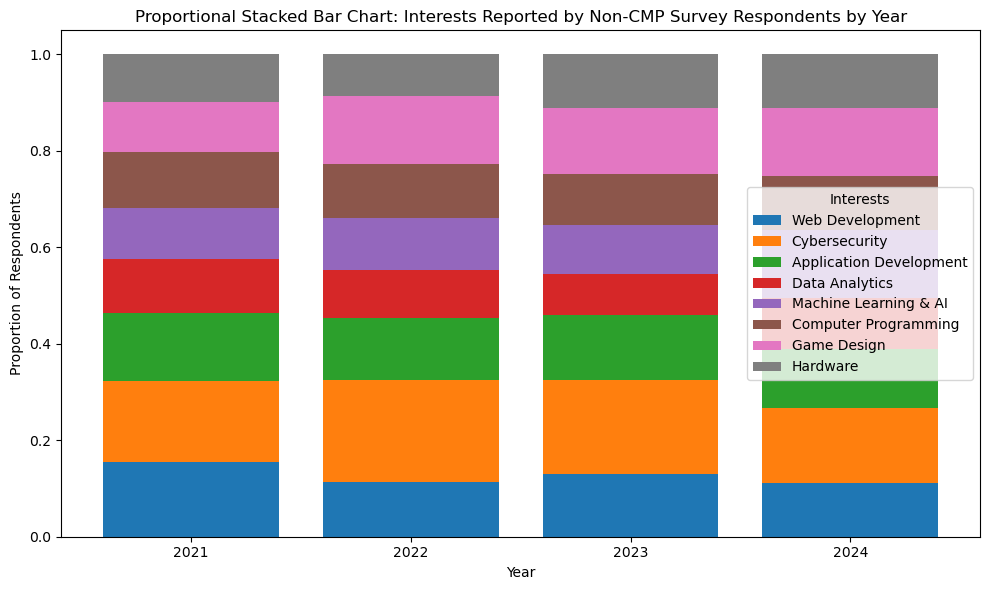

In [1707]:
# NOTE: Used Proportional Stacked Bar Chart in part 18 above as a template. 

# Create 'yes_counts' dataframe having count of 'Yes' from each column
yes_counts = survey[[
    'year',
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog',
    'interest_gamedes',
    'interest_hardware'
]].copy()

# Drop rows with NaN values in any of the relevant columns (2020)
yes_counts = yes_counts.dropna(subset=[
    'interest_webdev', 
    'interest_cybersec', 
    'interest_appdev', 
    'interest_dataanalytics', 
    'interest_mlai', 
    'interest_compprog', 
    'interest_gamedes', 
    'interest_hardware'
])

# Create INT columns representing yes/no with column labels that will be used in chart. 
yes_counts['Web Development'] = np.where(yes_counts['interest_webdev'] == 'Yes', 1, 0)
yes_counts['Cybersecurity'] = np.where(yes_counts['interest_cybersec'] == 'Yes', 1, 0)
yes_counts['Application Development'] = np.where(yes_counts['interest_appdev'] == 'Yes', 1, 0)
yes_counts['Data Analytics'] = np.where(yes_counts['interest_dataanalytics'] == 'Yes', 1, 0)
yes_counts['Machine Learning & AI'] = np.where(yes_counts['interest_mlai'] == 'Yes', 1, 0)
yes_counts['Computer Programming'] = np.where(yes_counts['interest_compprog'] == 'Yes', 1, 0)
yes_counts['Game Design'] = np.where(yes_counts['interest_gamedes'] == 'Yes', 1, 0)
yes_counts['Hardware'] = np.where(yes_counts['interest_hardware'] == 'Yes', 1, 0)

# Remove source columns.
yes_counts = yes_counts.drop('interest_webdev', axis = 1)
yes_counts = yes_counts.drop('interest_cybersec', axis = 1)
yes_counts = yes_counts.drop('interest_appdev', axis = 1)
yes_counts = yes_counts.drop('interest_dataanalytics', axis = 1)
yes_counts = yes_counts.drop('interest_mlai', axis = 1)
yes_counts = yes_counts.drop('interest_compprog', axis = 1)
yes_counts = yes_counts.drop('interest_gamedes', axis = 1)
yes_counts = yes_counts.drop('interest_hardware', axis = 1)

# Rename 'Year' column.
yes_counts = yes_counts.rename(columns = {
    'year': 'Year'
})

# Group by 'Year'
grouped = yes_counts.groupby('Year').sum()

# Convert counts to proportions by dividing each value by the row's total
grouped_proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Define x-axis positions and categories
years = grouped_proportions.index
categories = grouped_proportions.columns

# Initialize bottom values for stacking
bottom_values = np.zeros(len(years))  # Start stacking from 0 for all years

# Set up plot size
plt.figure(figsize=(10, 6))

# Loop through each category and add it to the proportional stacked bar chart
for category in categories:
    plt.bar(
        years,                            # X-axis (years remain the same)
        grouped_proportions[category],    # Heights of the current stack (proportions)
        bottom=bottom_values,             # Start stacking on top of previous bars
        label=category                    # Label for the legend
    )
    # Update the bottom values for stacking the next category
    bottom_values += grouped_proportions[category]

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Proportion of Respondents')
plt.title('Proportional Stacked Bar Chart: Interests Reported by Non-CMP Survey Respondents by Year')
plt.legend(title='Interests', loc='center right')  # Position legend at the top right

# Display and output the chart
plt.tight_layout()
plt.savefig('pt19 - Interests - Proportional Stacked Bar Chart by Year.jpg', format='jpg')  # Save plot to file
plt.show()

#### Conclusions from Part 19: Data Analysis - What interests are survey respondents seeking the most? Conversely, what are the least?
* Respondent's **interests were NOT collected in 2020**, so data only exists from 2021-24.
* Non-CMP enrolled survey respondents reported the following interests, from most reported to least:
    1. Cybersecurity (Count = 166)  
    2. Application Development (Count = 120)  
    3. Web Design (Count = 118)  
    4. Game Design (Count = 118)  
    5. Machine Learning & AI (Count = 103)  
    6. Computer Programming (Count = 103)  
    7. Data Analytics (Count = 93)  
    8. Hardware (Count = 93)  
* Except for Cybersecurity, the **range of interest is relatively tight** (only 27), meaning, any variation year-to-year will change the ordering. This is seen in the year-to-year plots, where Cybersecurity is the top interest across all years, and the other rank orders change slightly year-to-year due to variations in those interests.  
*  **Since 2022, Game Design has been the second leading interest** of respondents.  
*  Accounting for the overall decrease in survey responses, **almost all interests have seen a relative decrease**, with the exception of **Game Design and Hardware, each of which have seen a slight relative increase**.  